In [1]:
import sys  
sys.path.insert(0, '..')
from AT_funs import *

In [2]:
filename = 'ETH.MI.xlsx'
df = read_xlsx(filename)
ticker = filename.replace('xlsx', '')

filename_bm = 'FTSEMIB.MI.xlsx'
bm_df = read_xlsx(filename_bm)
bm_name = filename_bm.replace('xlsx', '')

In [3]:
bm_df

date     volume         high           low          open  \
0    2016-01-04 08:00:00  545475000  21194.00000  20702.000000  21186.000000   
1    2016-01-05 08:00:00  422559500  20983.00000  20722.000000  20938.000000   
2    2016-01-06 08:00:00  508538100  20931.00000  20373.000000  20922.000000   
3    2016-01-07 08:00:00  749548400  20289.00000  19629.000000  19778.000000   
4    2016-01-08 08:00:00  550008300  20350.00000  19869.000000  20189.000000   
...                  ...        ...          ...           ...           ...   
2124 2024-05-10 07:00:00  487475300  34748.00000  34483.000000  34508.000000   
2125 2024-05-13 07:00:00  503132600  34843.00000  34620.000000  34663.000000   
2126 2024-05-14 07:00:00  695326600  35190.00000  34800.000000  34811.000000   
2127 2024-05-15 07:00:00  730951200  35374.00000  35175.000000  35293.000000   
2128 2024-05-16 08:42:49          0  35440.71875  35314.898438  35398.171875   

             close     adj_close      ticker  
0     20734.000000  20734.000000  FTSEMIB.MI  
1     20983.000000  20983.000000  FTSEMIB.MI  
2     20422.000000  20422.000000  FTSEMIB.MI  
3     20189.000000  20189.000000  FTSEMIB.MI  
4     19869.000000  19869.000000  FTSEMIB.MI  
...            ...           ...         ...  
2124  34657.000000  34657.000000  FTSEMIB.MI  
2125  34816.000000  34816.000000  FTSEMIB.MI  
2126  35151.000000  35151.000000  FTSEMIB.MI  
2127  35366.000000  35366.000000  FTSEMIB.MI  
2128  35372.601562  35372.601562  FTSEMIB.MI  

[2129 rows x 8 columns]

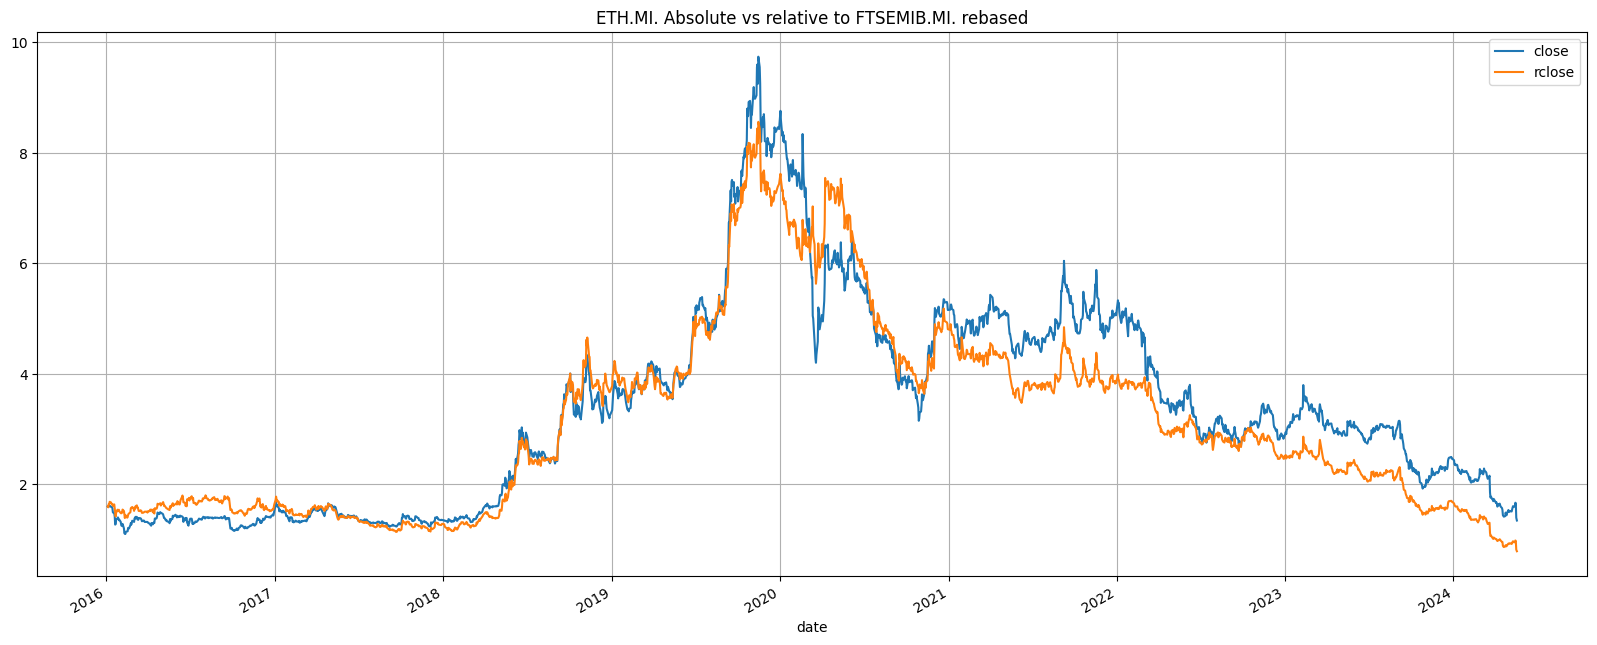

In [4]:
plot_abs_rel(df, ticker, bm_df, bm_name)

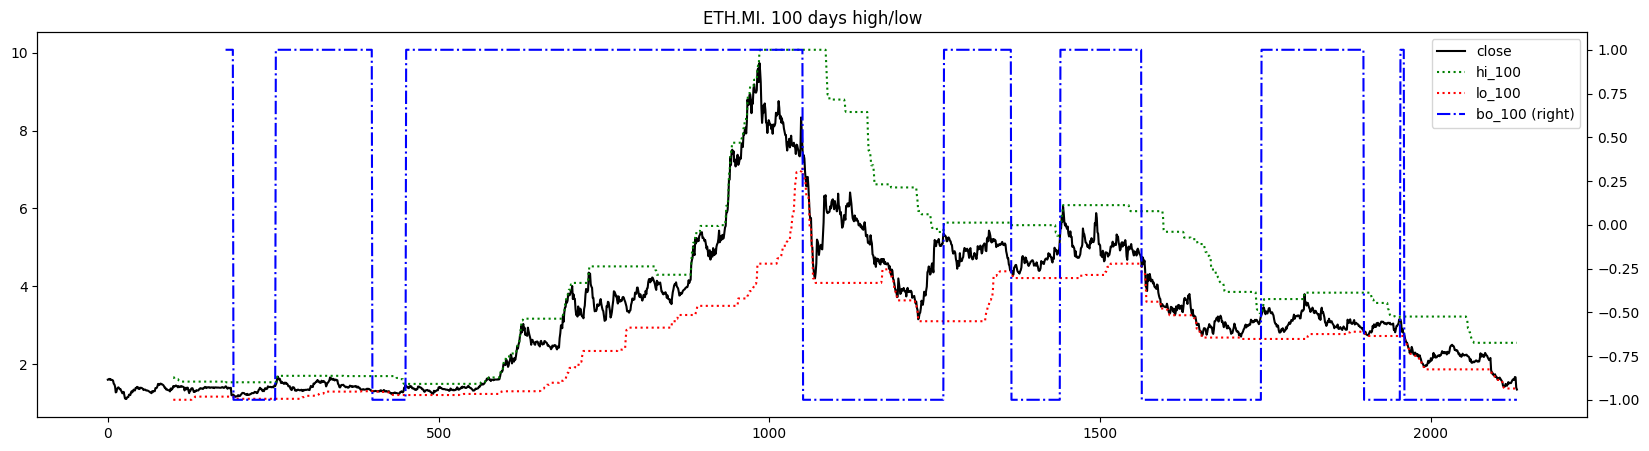

In [5]:
window_bo = 100
df_bo = df.copy()
df_bo = signal_bo(df_bo, window_bo)
bo_signal = 'bo_' + str(window_bo)
plot_signal_bo(df_bo, window_bo, ticker)

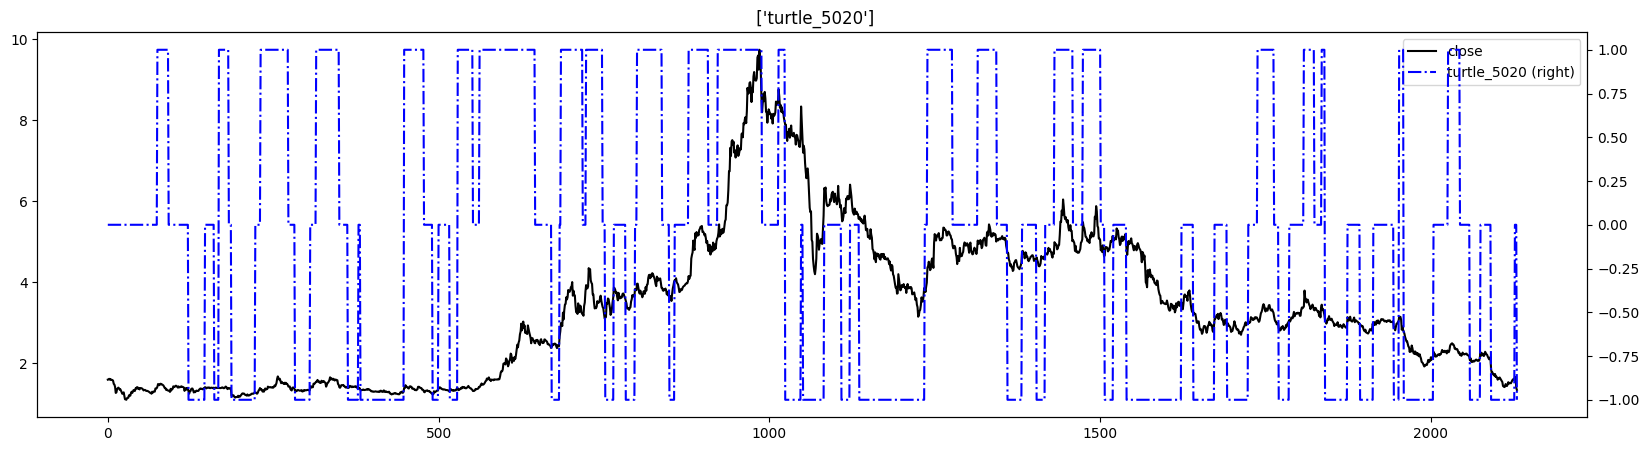

In [6]:
fast = 20
slow = 50
df_tt = df.copy()
df_tt = signal_tt(df_tt, fast = fast, slow = slow)
tt_signal = 'turtle_' + str(slow) + str(fast)
plot_signal_tt(df_tt, fast, slow)

In [32]:
df_tt

date   volume   high    low   open  close  adj_close  \
0    2016-01-04 08:00:00    65572  1.630  1.580  1.620  1.597      1.597   
1    2016-01-05 08:00:00    85209  1.656  1.593  1.600  1.602      1.602   
2    2016-01-06 08:00:00    28045  1.618  1.601  1.602  1.618      1.618   
3    2016-01-07 08:00:00    68811  1.605  1.563  1.605  1.598      1.598   
4    2016-01-08 08:00:00    29196  1.615  1.591  1.596  1.613      1.613   
...                  ...      ...    ...    ...    ...    ...        ...   
2126 2024-05-13 07:00:00   209617  1.618  1.572  1.584  1.596      1.596   
2127 2024-05-14 07:00:00   305199  1.670  1.592  1.600  1.666      1.666   
2128 2024-05-15 07:00:00   362057  1.692  1.650  1.680  1.658      1.658   
2129 2024-05-16 07:00:00  1420193  1.462  1.380  1.382  1.394      1.394   
2130 2024-05-17 15:35:18  1372930  1.446  1.320  1.404  1.344      1.344   

      ticker  bo_50  bo_20  turtle_5020  
0     ETH.MI    NaN    NaN            0  
1     ETH.MI    NaN    NaN            0  
2     ETH.MI    NaN    NaN            0  
3     ETH.MI    NaN    NaN            0  
4     ETH.MI    NaN    NaN            0  
...      ...    ...    ...          ...  
2126  ETH.MI   -1.0   -1.0           -1  
2127  ETH.MI   -1.0    1.0            0  
2128  ETH.MI   -1.0    1.0            0  
2129  ETH.MI   -1.0    1.0            0  
2130  ETH.MI   -1.0   -1.0           -1  

[2131 rows x 11 columns]

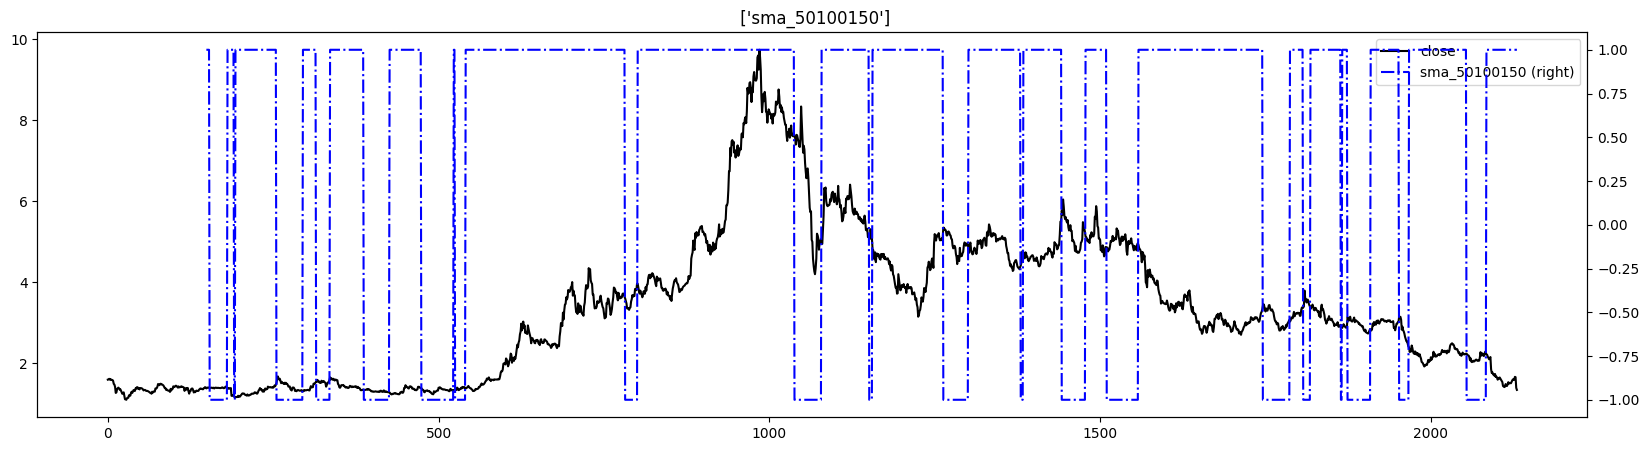

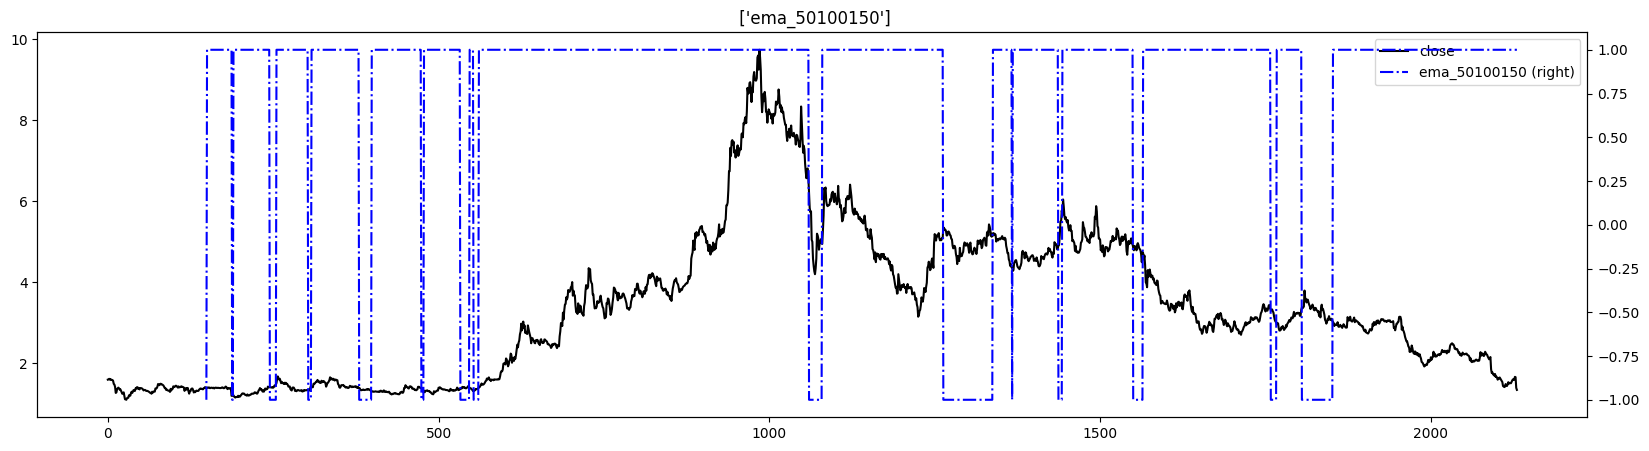

In [7]:
st = 50
mt = 100
lt = 150
df_ma = df.copy()
df_ma = signal_sma(df_ma, st, mt, lt)
df_ma = signal_ema(df_ma, st, mt, lt)

sma_signal = 'sma_' + str(st) + str(mt) + str(lt)
ema_signal = 'ema_' + str(st) + str(mt) + str(lt)

plot_signal_ma(df_ma, st, mt, lt)

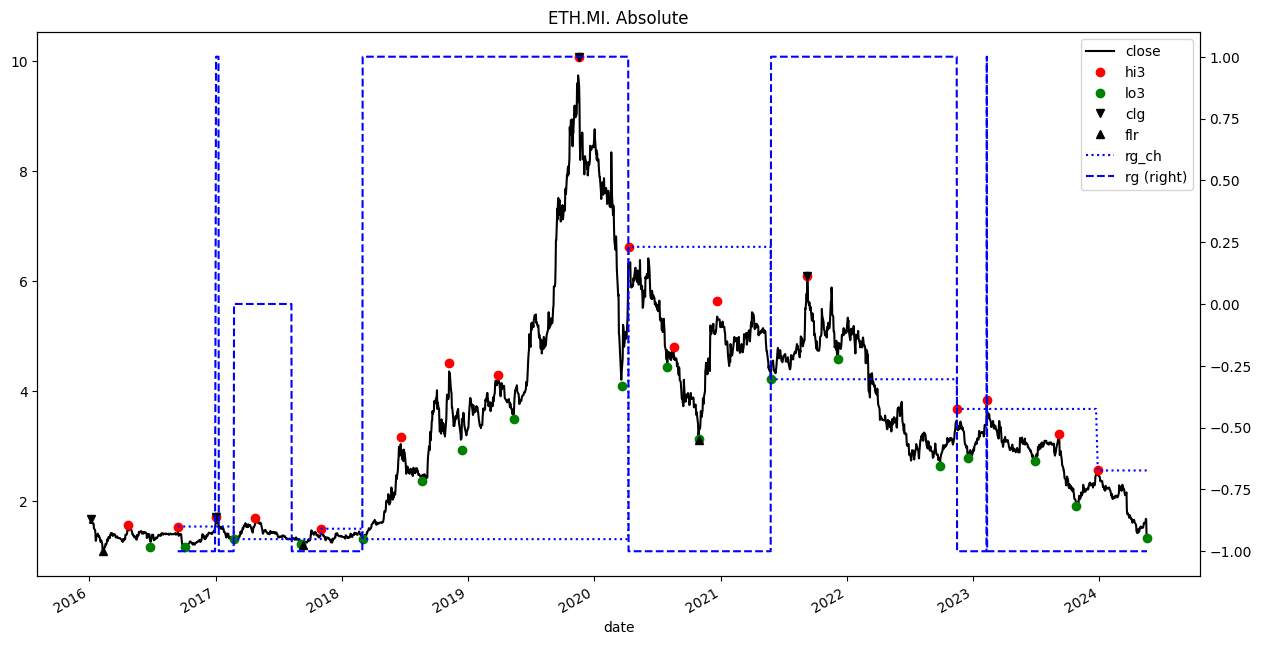

In [8]:
df_fc = df.copy()
df_fc = detect_regime(df_fc, bm_df)
fc_signal = 'rg'
fcr_signal = 'rrg'
plot_signal_abs(df_fc, ticker)

In [9]:
# df_fc = df_fc[['date', 
#        'ropen', 'rhigh', 'rlow', 'rclose', 'rh1', 'rl1', 'rh2', 'rl2', 'rh3',
#        'rl3', 'rh4', 'rl4', 'rrt', 'rrg', 'rflr', 'rclg', 'rrg_ch']]

# df_fc.to_excel('no_appendix.xlsx', index=False)

In [10]:
_o,_h,_l,_c = lower_upper_OHLC(df,relative = False)
rhs = ['hi1', 'lo1','hi2', 'lo2', 'hi3', 'lo3']
rt_hi,rt_lo,_hi,_lo,shi,slo = [rhs[h] for h in range(len(rhs))]
bm_col = 'close'
dgt = 5
df= relative(df,_o,_h,_l,_c, bm_df, bm_col, dgt= dgt, rebase=True)

params = ['2014-12-31', None, 63, 0.05, 0.05, 1.5, 2,5,2.5,3]
start,end,vlty_n,dist_pct,retrace_pct,threshold,dgt,d_vol,r_vol,lvl= [params[h] for h in range(len(params))]

swing_val = ['rg','lo1','hi1','lo3','hi3','clg','flr','rg_ch']
rg,rt_lo,rt_hi,slo,shi,clg,flr,rg_ch = [swing_val[s] for s in range(len(swing_val))]   

for a in np.arange(0,2):
    df = round(historical_swings(df,_o,_h,_l,_c, dist= None, hurdle= None),dgt)
    # df = cleanup_latest_swing(df,shi,slo,rt_hi,rt_lo)
    # ud, bs, bs_dt, _rt, _swg, hh_ll, hh_ll_dt = latest_swing_variables(df,shi,slo,rt_hi,rt_lo,_h,_l, _c)
    # vlty = round(average_true_range(df,_h,_l,_c, n= vlty_n)[hh_ll_dt],dgt)
    # dist_vol = d_vol * vlty
    # _sign = test_distance(ud,bs, hh_ll, dist_vol, dist_pct)
    # df = retest_swing(df, _sign, _rt, hh_ll_dt, hh_ll, _c, _swg)
    # retrace_vol = r_vol * vlty
    # df = retracement_swing(df, _sign, _swg, _c, hh_ll_dt, hh_ll, vlty, retrace_vol, retrace_pct)
    # stdev = df[_c].rolling(vlty_n).std(ddof=0)
    # df = regime_floor_ceiling(df,_h,_l,_c,slo, shi,flr,clg,rg,rg_ch,stdev,threshold)
    _o,_h,_l,_c = lower_upper_OHLC(df,relative = True)
    # rswing_val = ['rrg','rl1','rh1','rl3','rh3','rclg','rflr','rrg_ch']
    # rg,rt_lo,rt_hi,slo,shi,clg,flr,rg_ch = [rswing_val[s] for s in range(len(rswing_val))]
    


In [11]:
num_cols = df.select_dtypes(include=[np.number])  
sums = num_cols.sum()  
sums

volume       6.857587e+08
high         7.275410e+03
low          6.986050e+03
open         7.137420e+03
close        7.122190e+03
adj_close    7.122190e+03
ropen        6.595990e+03
rhigh        6.725940e+03
rlow         6.452930e+03
rclose       6.581800e+03
hi1          1.434640e+03
lo1          1.321050e+03
hi2          2.874200e+02
lo2          2.319800e+02
hi3          6.641000e+01
lo3          4.537000e+01
hi4          2.037000e+01
lo4          8.120000e+00
rh1          1.422770e+03
rl1          1.315480e+03
rh2          3.001500e+02
rl2          2.529300e+02
rh3          6.292000e+01
rl3          4.334000e+01
rh4          1.379000e+01
rl4          4.580000e+00
dtype: float64

1
1


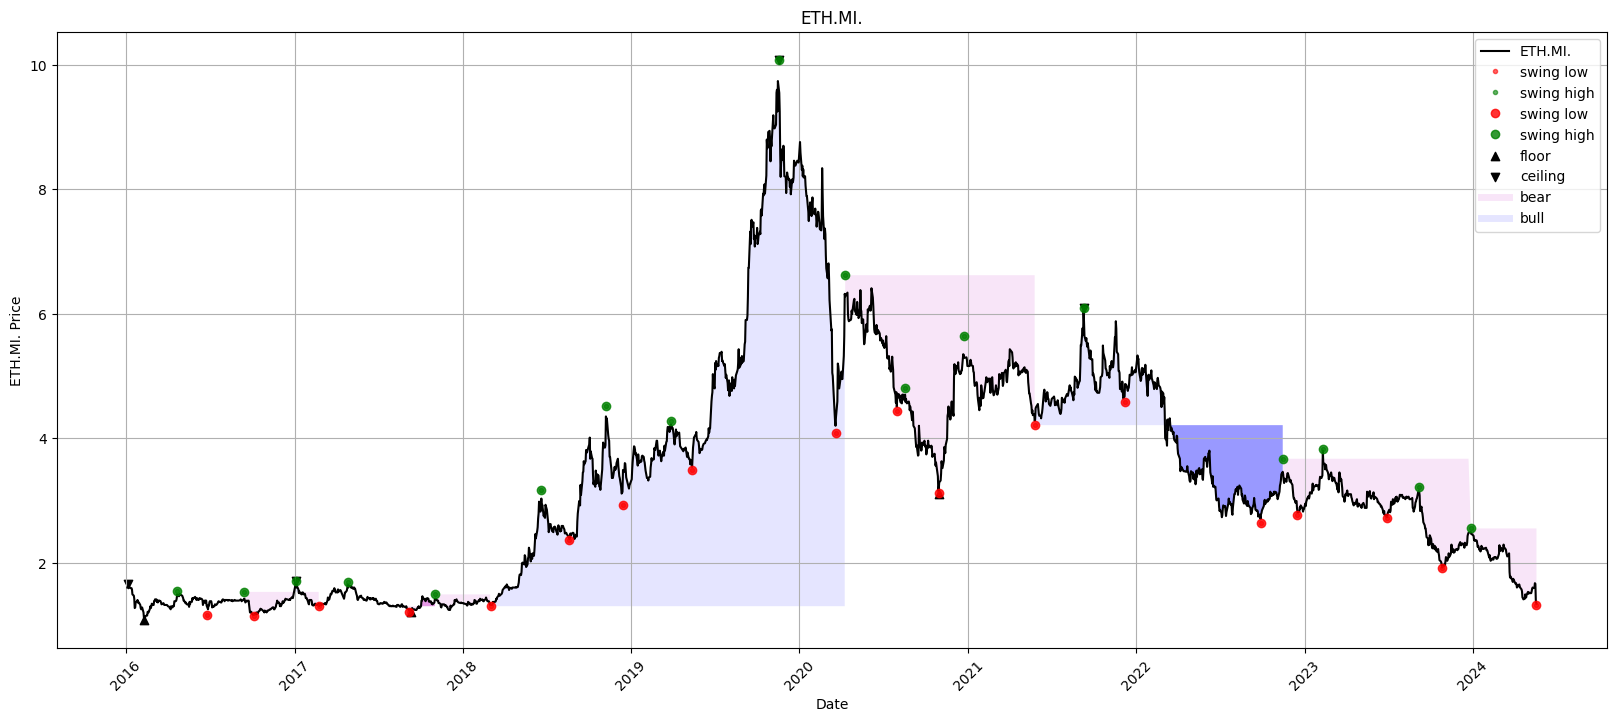

In [12]:
plot_regime_abs(df_fc, ticker)

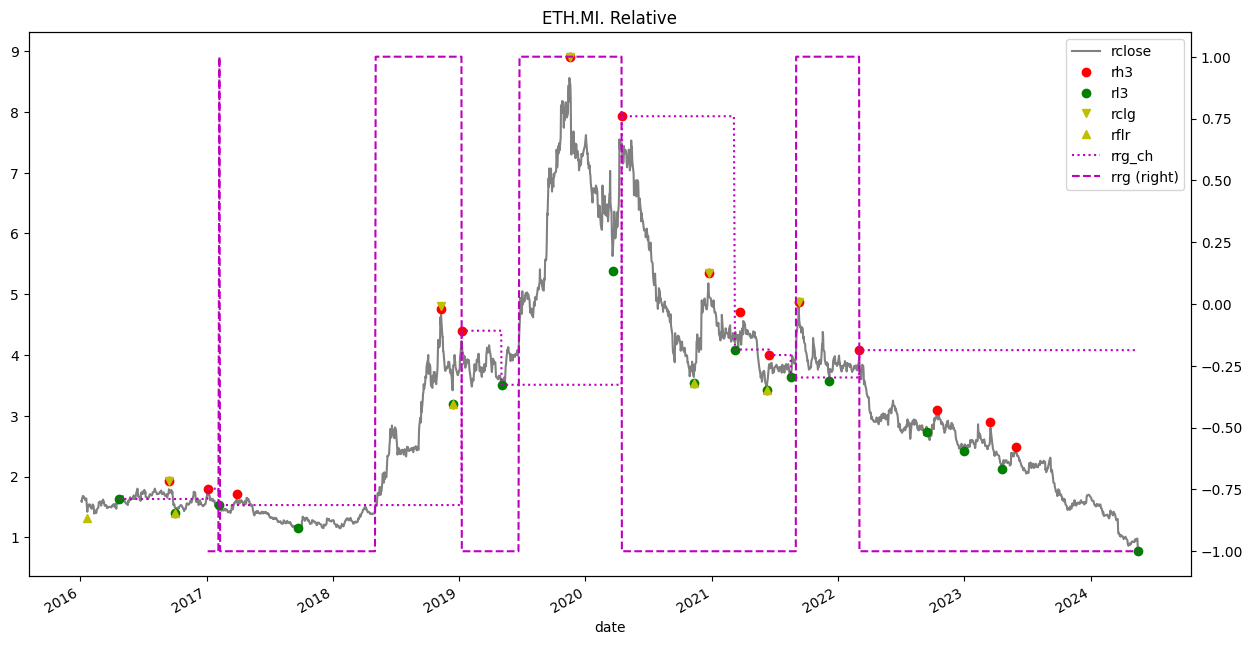

In [13]:
plot_signal_rel(df_fc, ticker)

1
1


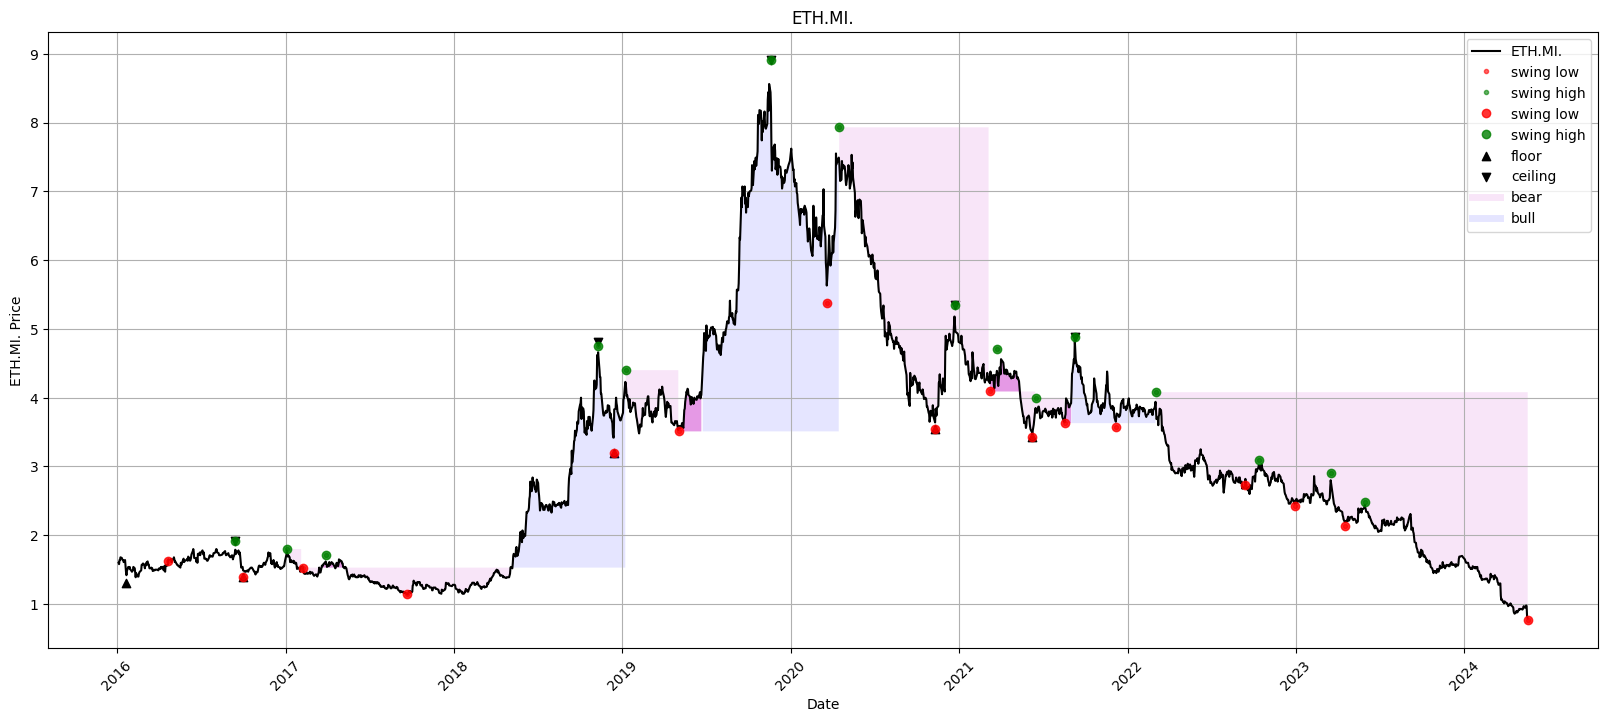

In [14]:
plot_regime_rel(df_fc, ticker)

In [15]:
df_fc

date   volume  high   low  open  close  adj_close  ticker  \
0    2016-01-04 08:00:00    65572  1.63  1.58  1.62   1.60       1.60  ETH.MI   
1    2016-01-05 08:00:00    85209  1.66  1.59  1.60   1.60       1.60  ETH.MI   
2    2016-01-06 08:00:00    28045  1.62  1.60  1.60   1.62       1.62  ETH.MI   
3    2016-01-07 08:00:00    68811  1.61  1.56  1.61   1.60       1.60  ETH.MI   
4    2016-01-08 08:00:00    29196  1.62  1.59  1.60   1.61       1.61  ETH.MI   
...                  ...      ...   ...   ...   ...    ...        ...     ...   
2126 2024-05-13 07:00:00   209617  1.62  1.57  1.58   1.60       1.60  ETH.MI   
2127 2024-05-14 07:00:00   305199  1.67  1.59  1.60   1.67       1.67  ETH.MI   
2128 2024-05-15 07:00:00   362057  1.69  1.65  1.68   1.66       1.66  ETH.MI   
2129 2024-05-16 07:00:00  1420193  1.46  1.38  1.38   1.39       1.39  ETH.MI   
2130 2024-05-17 15:35:18  1372930  1.45  1.32  1.40   1.34       1.34  ETH.MI   

      ropen  rhigh  ...  rh2  rl2  rh3   rl3  rh4  rl4  rrg  rflr  rclg  \
0      1.62   1.63  ...  NaN  NaN  NaN   NaN  NaN  NaN  NaN   NaN   NaN   
1      1.58   1.64  ...  NaN  NaN  NaN   NaN  NaN  NaN  NaN   NaN   NaN   
2      1.63   1.64  ...  NaN  NaN  NaN   NaN  NaN  NaN  NaN   NaN   NaN   
3      1.65   1.65  ...  NaN  NaN  NaN   NaN  NaN  NaN  NaN   NaN   NaN   
4      1.67   1.69  ...  NaN  NaN  NaN   NaN  NaN  NaN  NaN   NaN   NaN   
...     ...    ...  ...  ...  ...  ...   ...  ...  ...  ...   ...   ...   
2126   0.94   0.96  ...  NaN  NaN  NaN   NaN  NaN  NaN -1.0   NaN   NaN   
2127   0.94   0.99  ...  NaN  NaN  NaN   NaN  NaN  NaN -1.0   NaN   NaN   
2128   0.98   0.99  ...  NaN  NaN  NaN   NaN  NaN  NaN -1.0   NaN   NaN   
2129   0.81   0.86  ...  NaN  NaN  NaN   NaN  NaN  NaN -1.0   NaN   NaN   
2130   0.82   0.85  ...  NaN  NaN  NaN  0.77  NaN  NaN -1.0   NaN   NaN   

      rrg_ch  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
2126    4.08  
2127    4.08  
2128    4.08  
2129    4.08  
2130    4.08  

[2131 rows x 36 columns]

In [16]:
method = ['breakout', 'turtle', 'sma', 'ema', 'floor_ceiling', 'floor_ceiling_relative']
signal = [bo_signal, tt_signal, sma_signal, ema_signal, fc_signal, fcr_signal]
df_signal = [df_bo, df_tt, df_ma, df_ma, df_fc, df_fc]

# method = ['turtle']
# signal = [tt_signal]
# df_signal = [df_tt]

In [17]:
def get_df_signal(df_signal, signal, window_exp):
    df_signal = df_signal.copy()
    df_signal = get_returns(df_signal, signal)
    df_signal = get_expectancies(df_signal, window_exp)
    return df_signal
    

In [18]:
window_exp = 100  # set the value of window_exp  
output_signals = []  # create an empty list to hold the output dataframes  
  
for i in range(len(signal)):  
    df = df_signal[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_df_signal(df, s, window_exp)  # call the function on the ith dataframe and signal  
    output_df['method'] = str(m)  # create a new column in output_df with the signal name  
    output_signals.append(output_df)  # append the output dataframe to the list  
  
# output_signals now contains the processed dataframes with the signal column added  


In [19]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'close', 'stop_loss','tt_cumul']]
output_df_sel.groupby('method').last() 

close  stop_loss   tt_cumul
method                                             
breakout                1.344      1.692   2.841858
ema                     1.344      1.320   0.747106
floor_ceiling           1.340      1.690  10.740276
floor_ceiling_relative  1.340      1.690   5.825106
sma                     1.344      1.320  10.549104
turtle                  1.344      1.692   0.189394

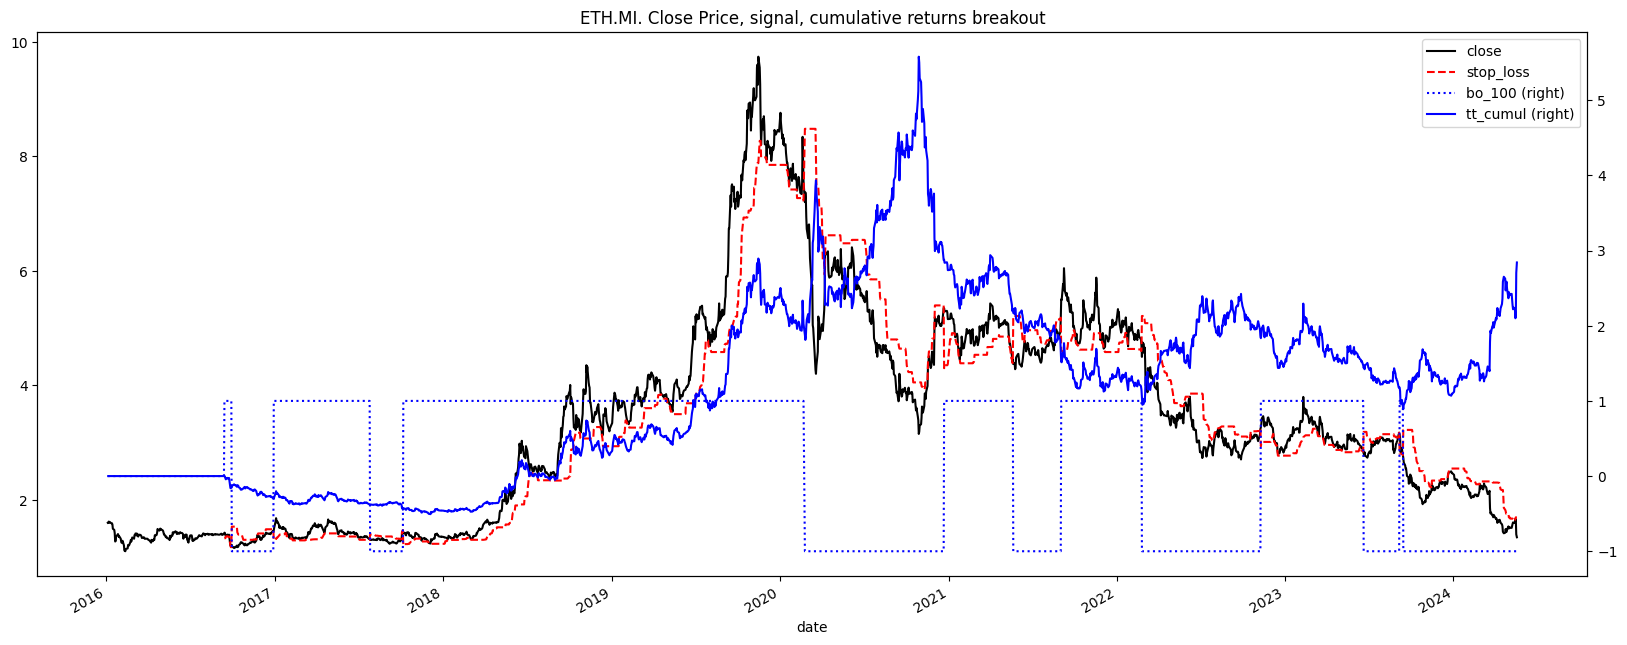

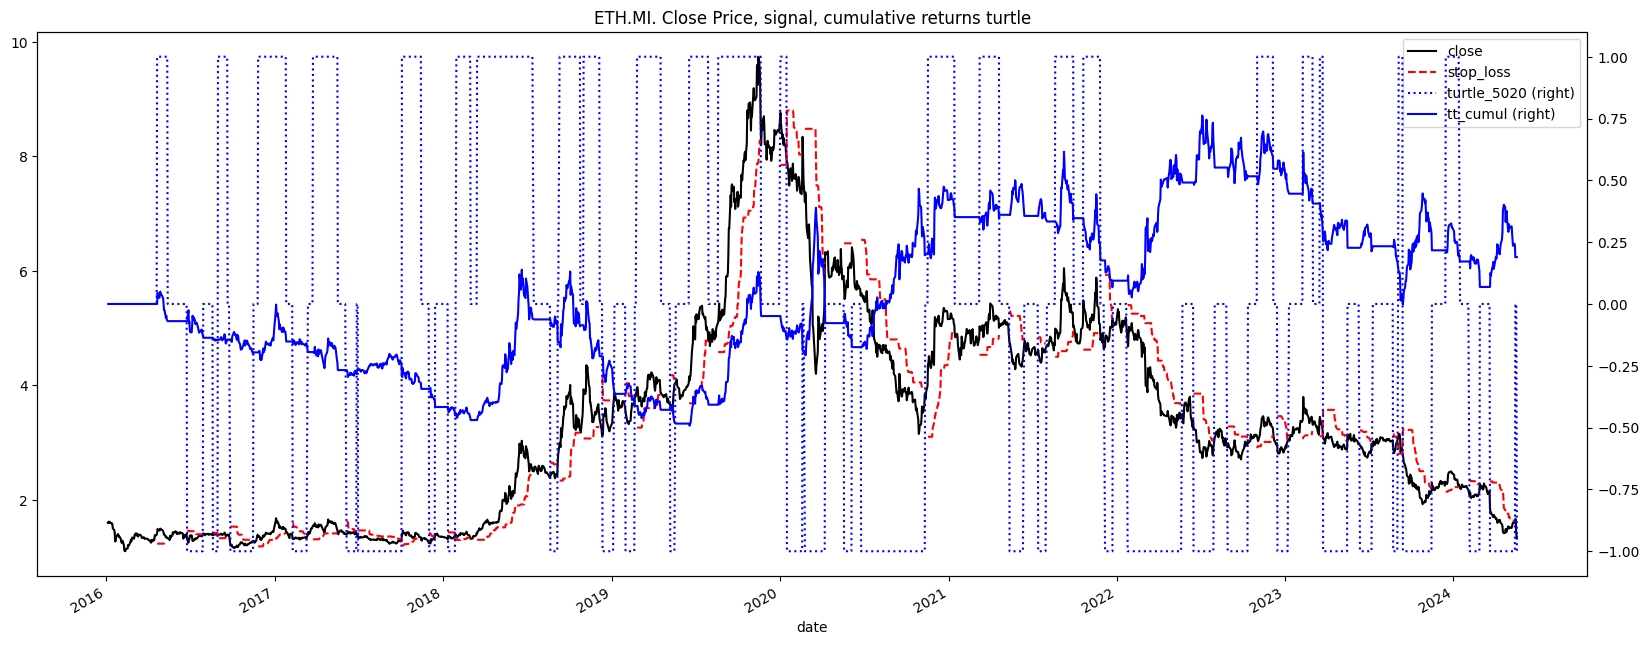

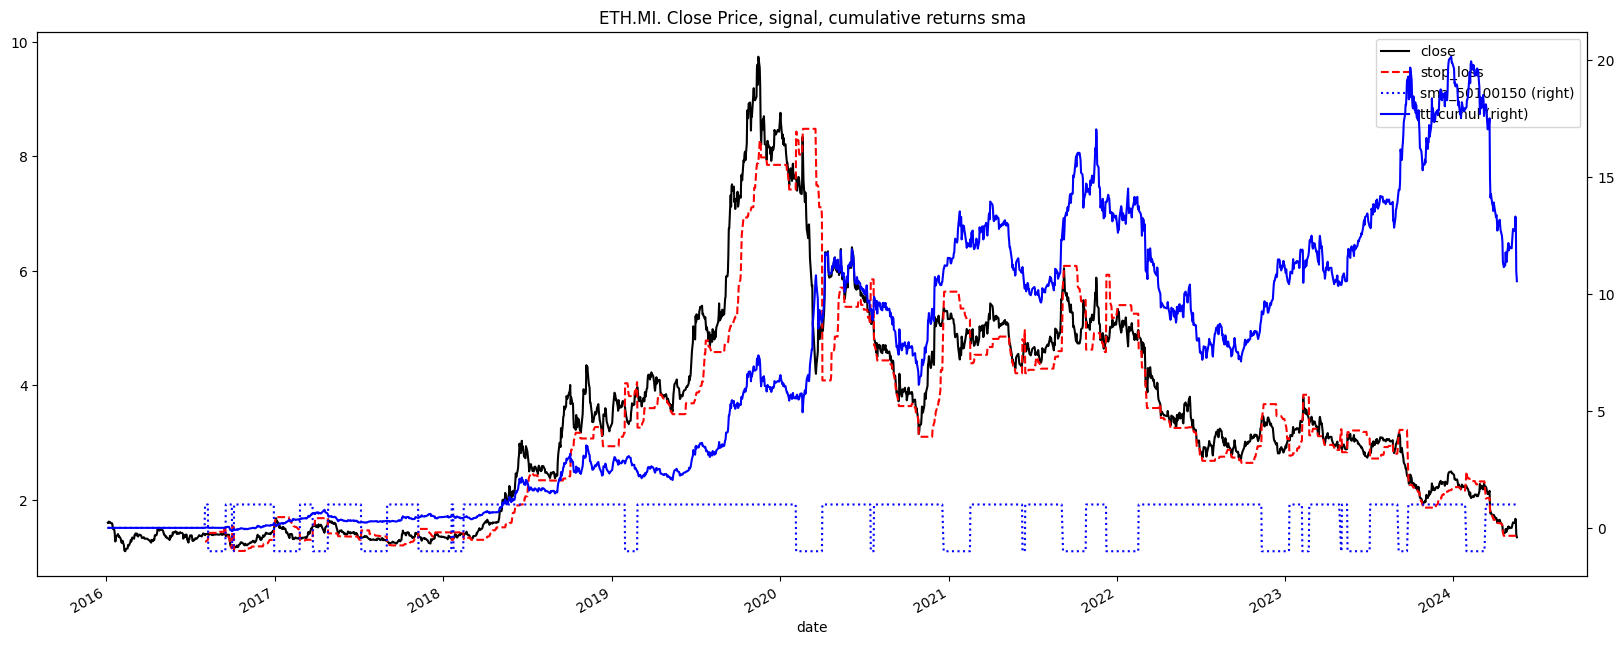

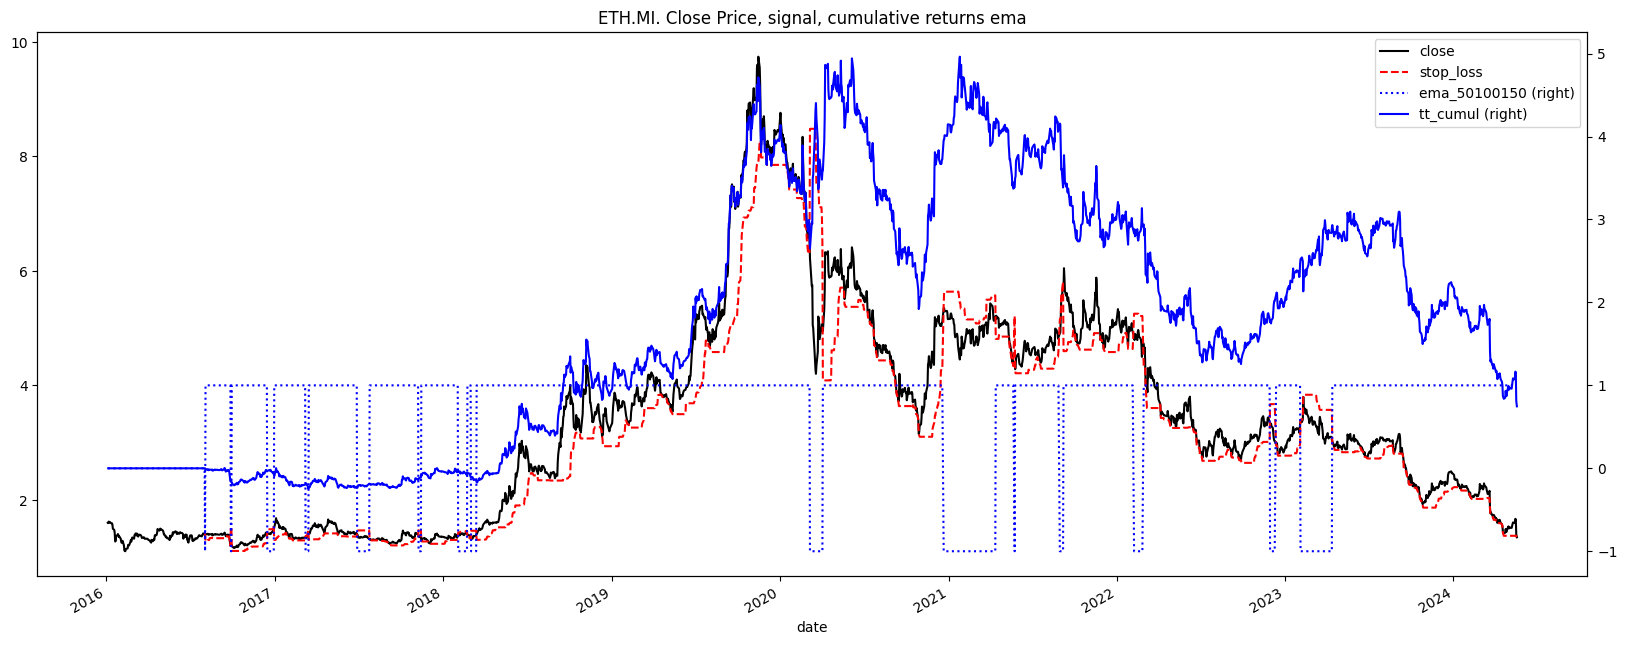

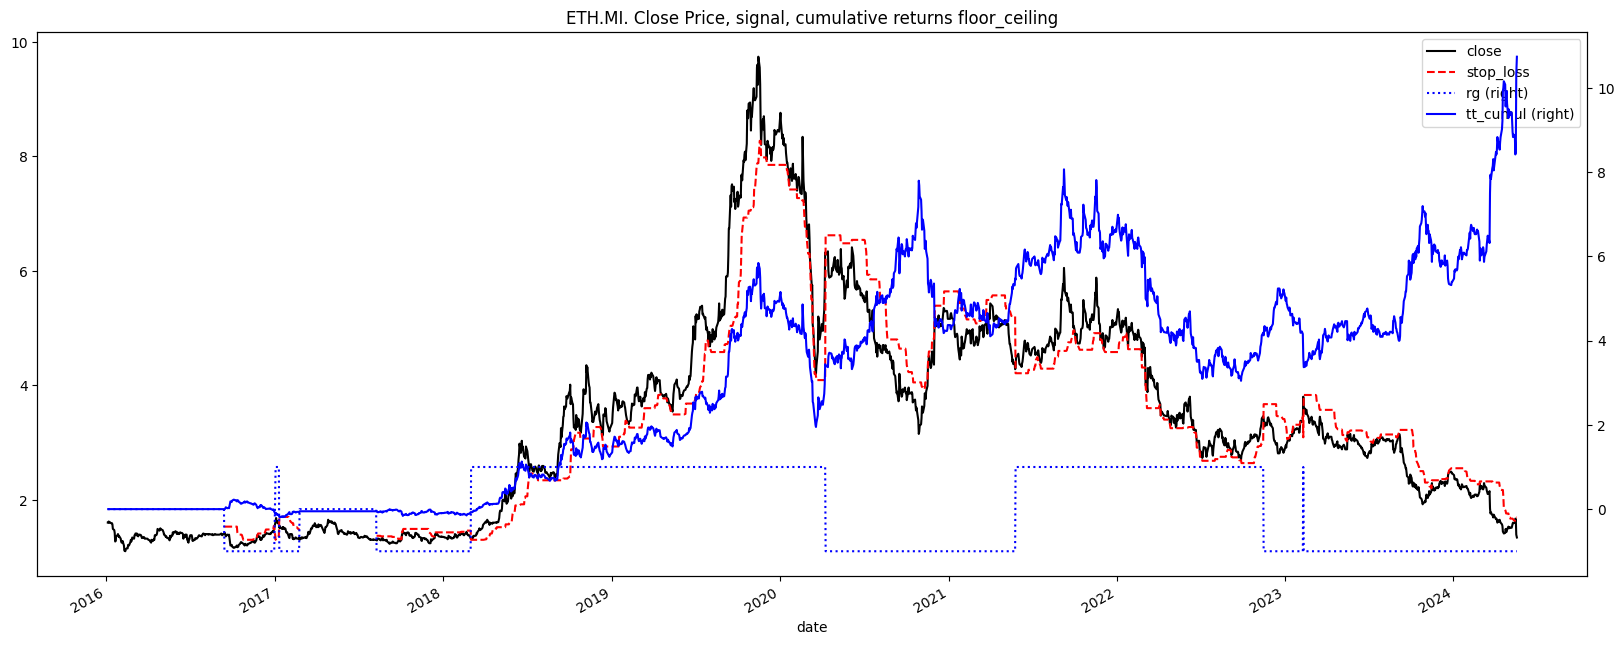

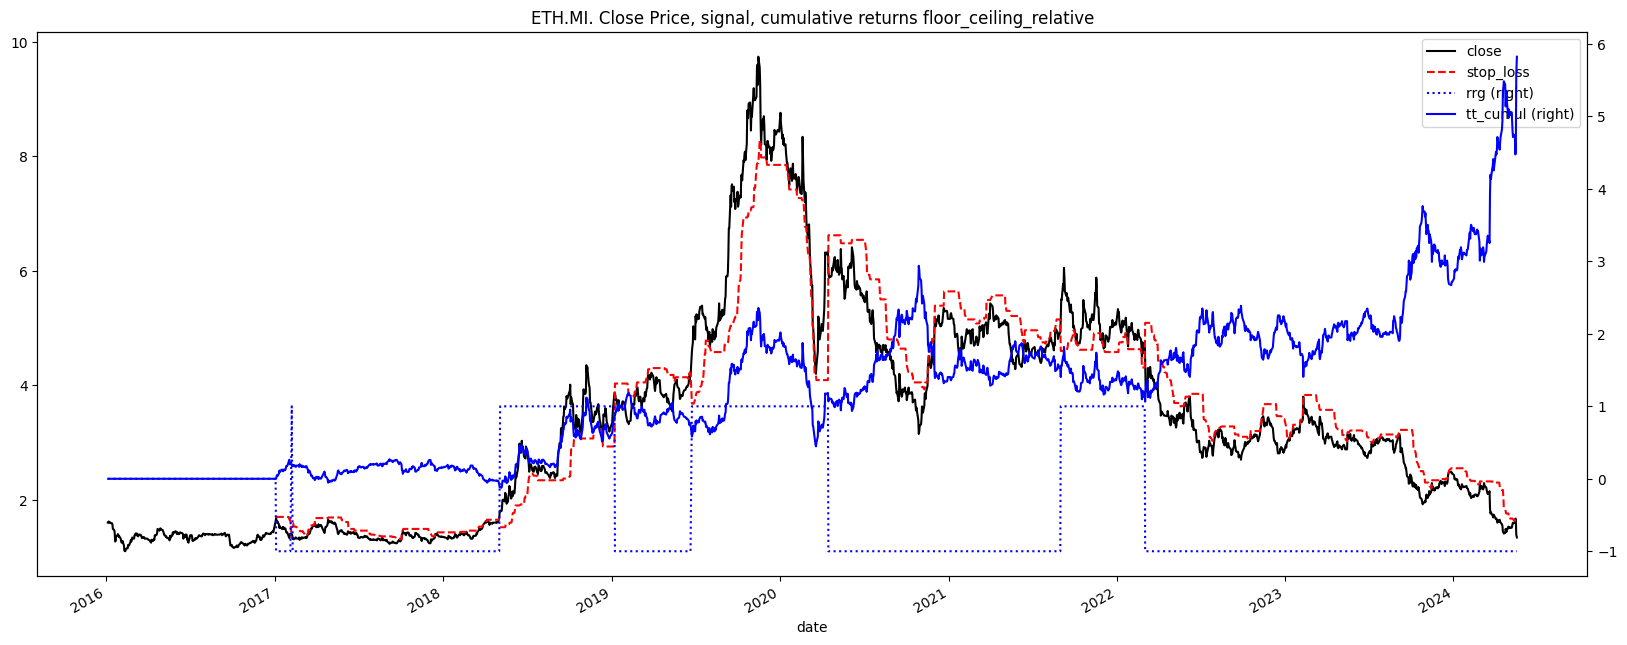

In [20]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_price_signal_cumreturns(df, ticker, s, m)

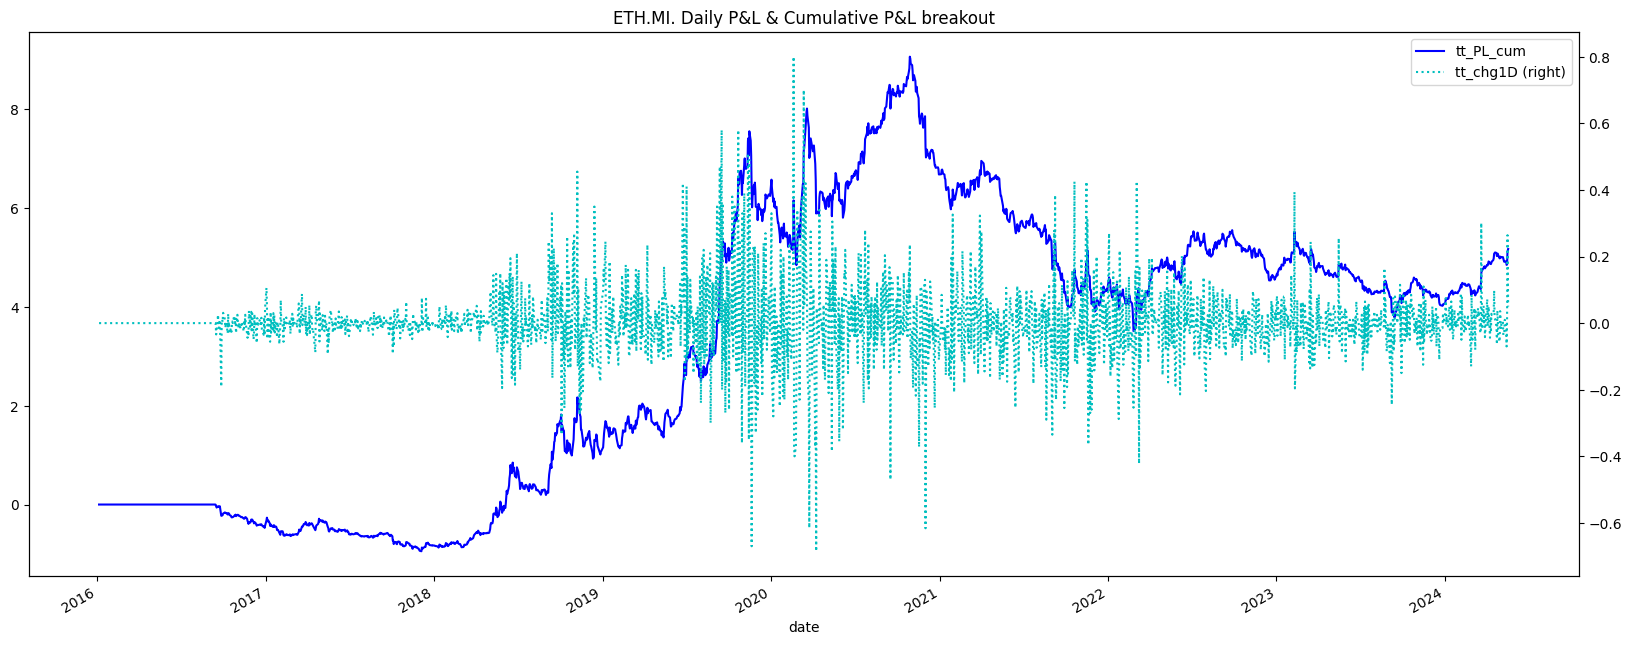

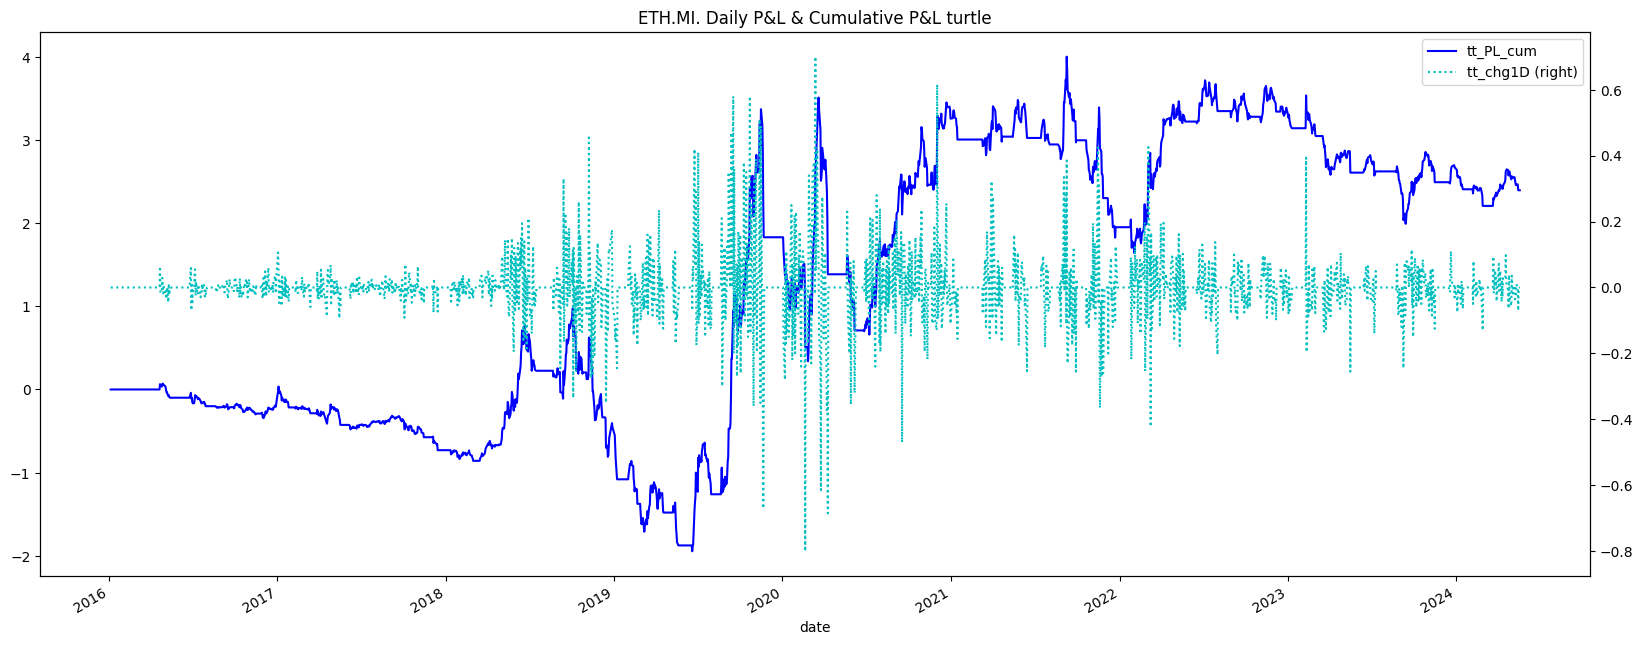

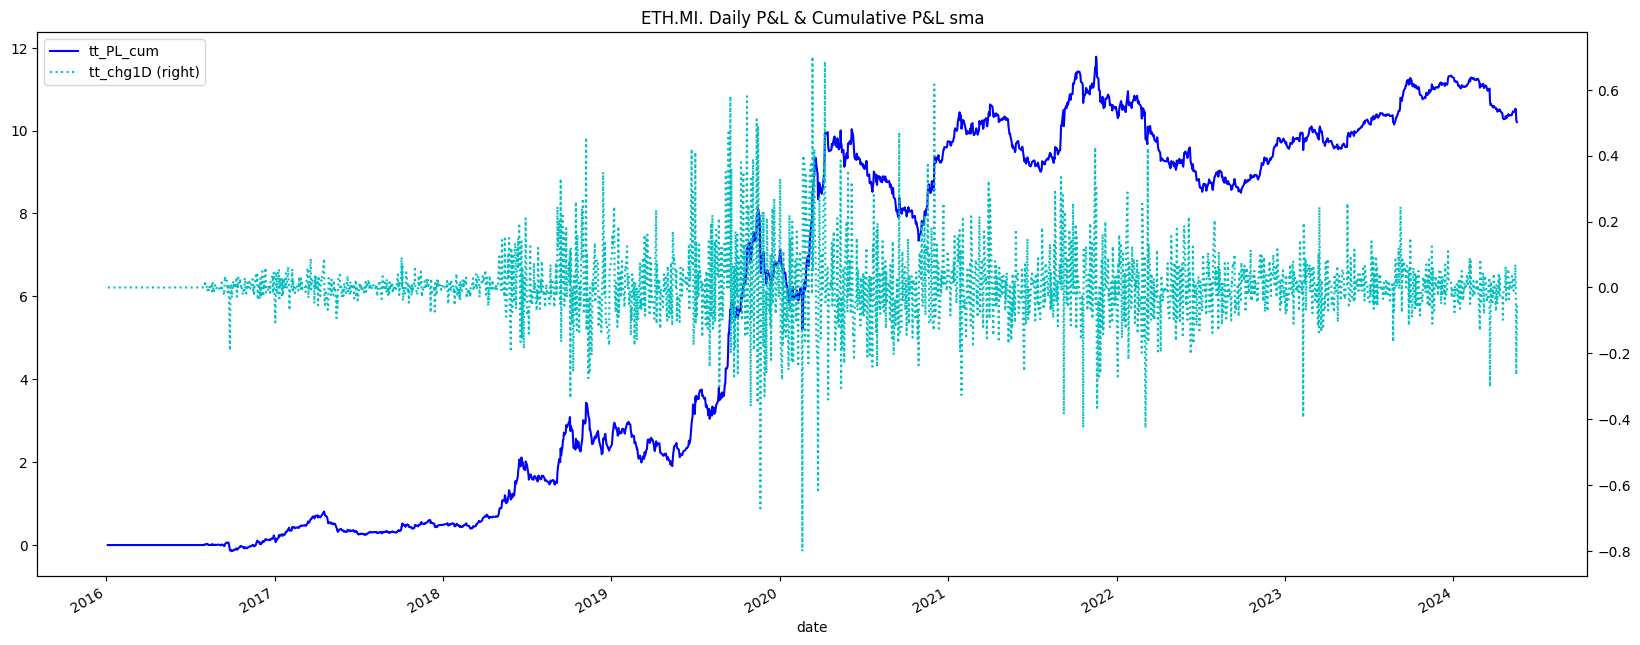

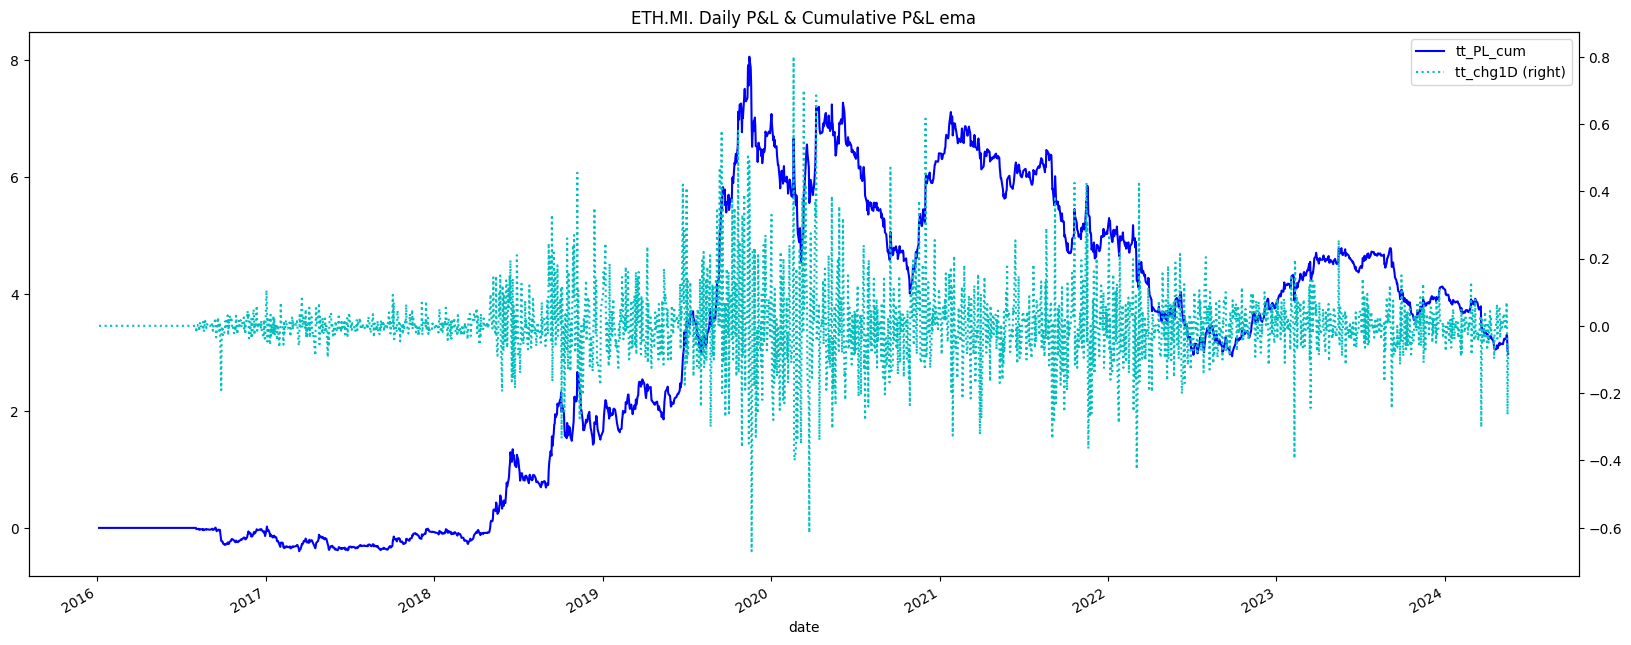

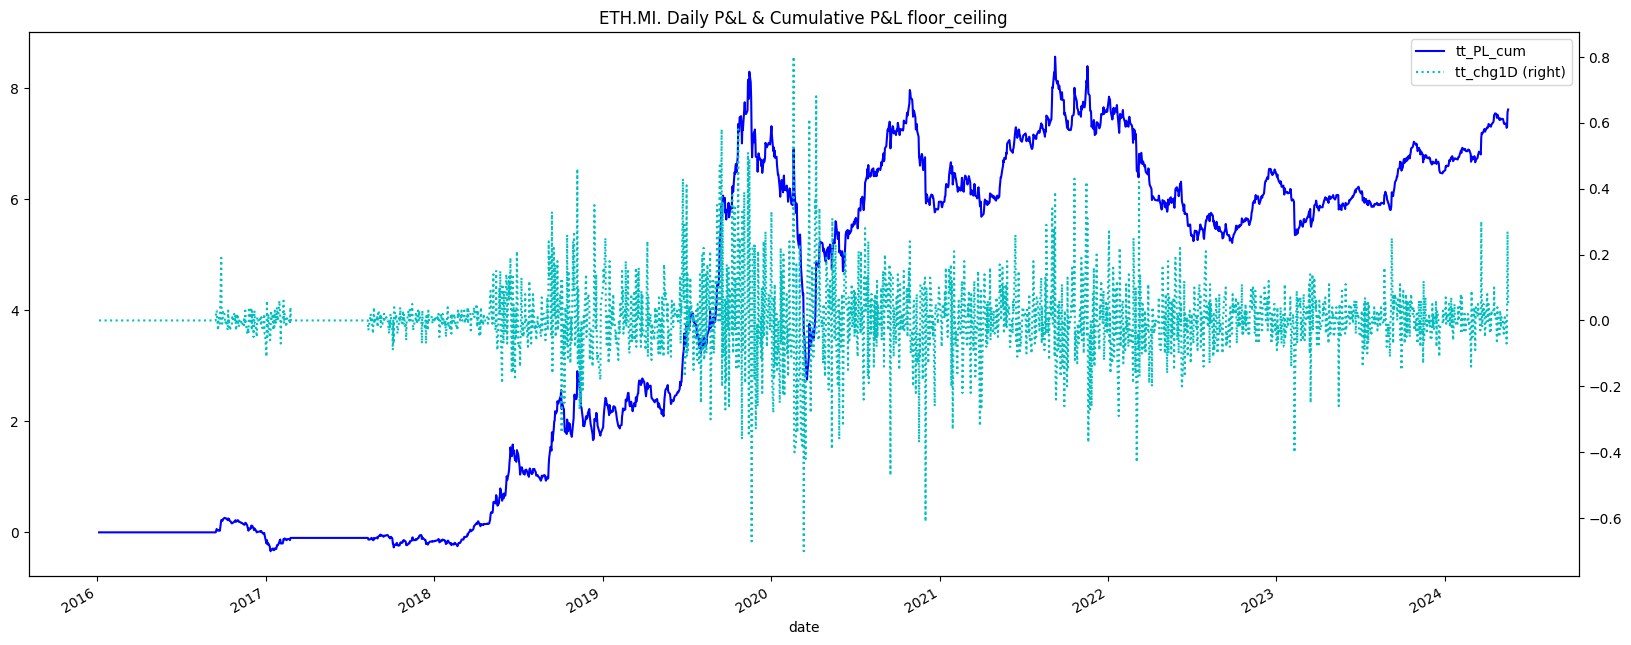

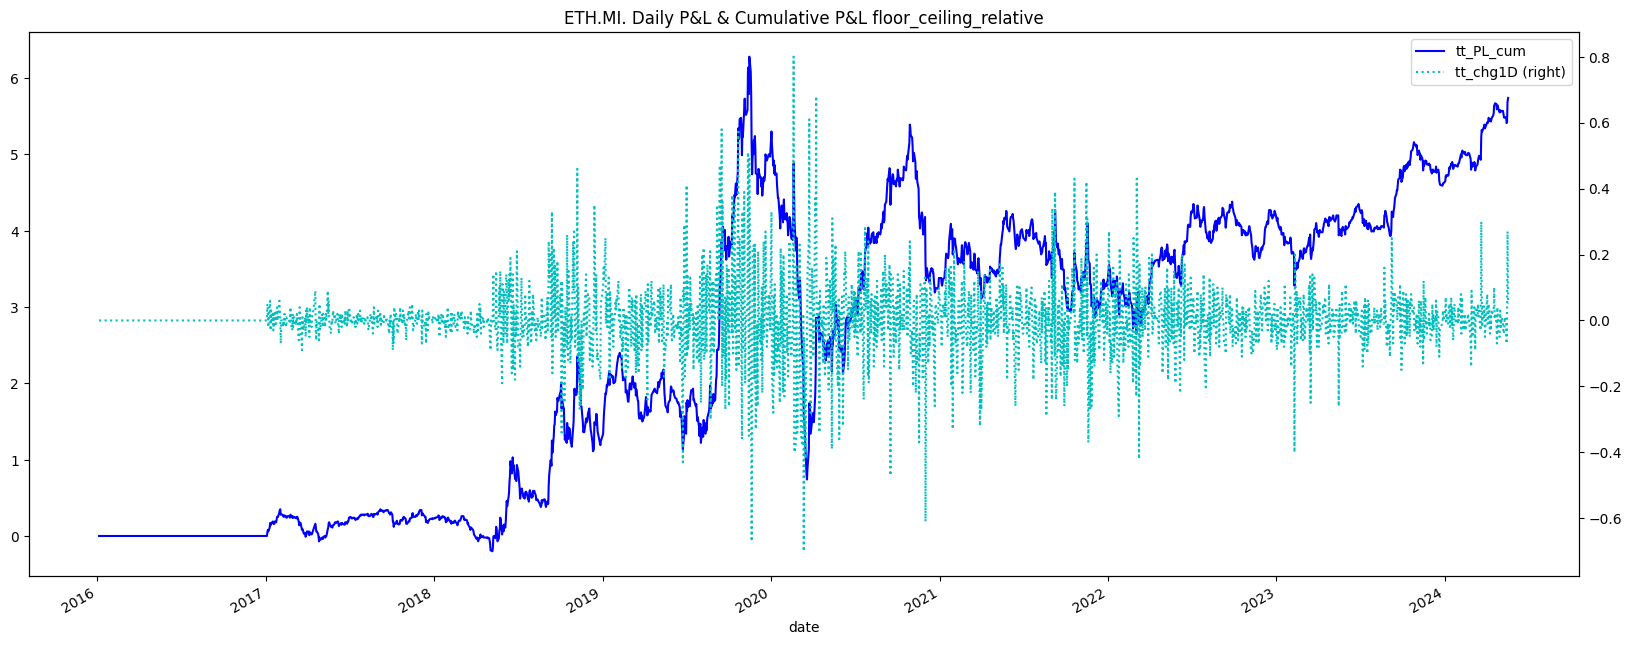

In [21]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_PL(df, ticker, m)

In [22]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'trading_edge','geometric_expectancy','kelly']]
output_df_sel.groupby('method').last() 

trading_edge  geometric_expectancy      kelly
method                                                               
breakout                    0.004965              0.004920  59.031453
ema                        -0.004385             -0.004431 -52.140308
floor_ceiling               0.005370              0.005326  63.004683
floor_ceiling_relative      0.005370              0.005326  63.004683
sma                        -0.003738             -0.003785 -44.238230
turtle                      0.001576              0.001562  48.530922

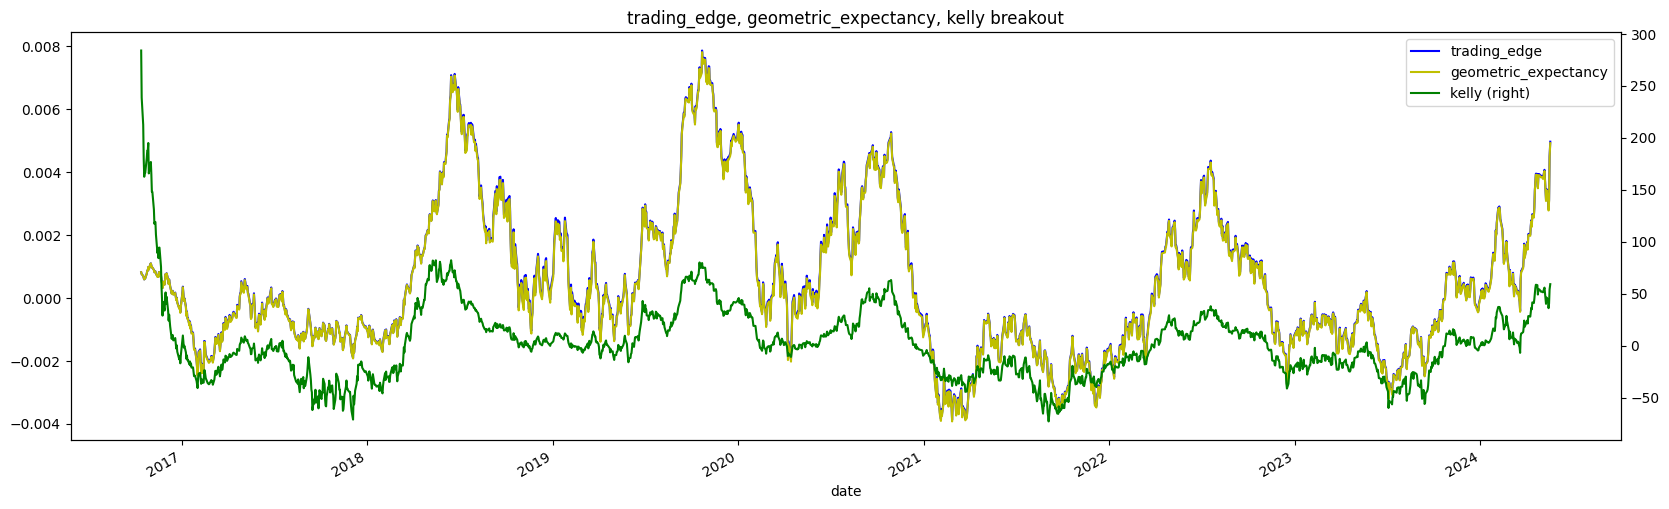

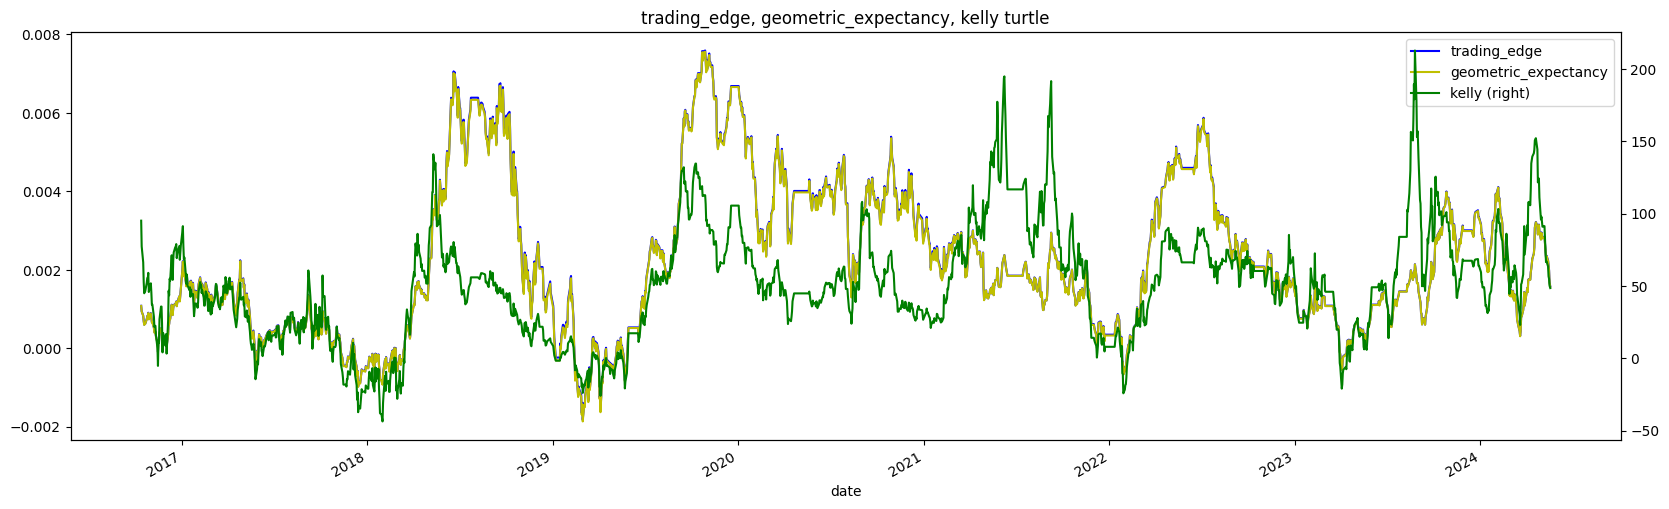

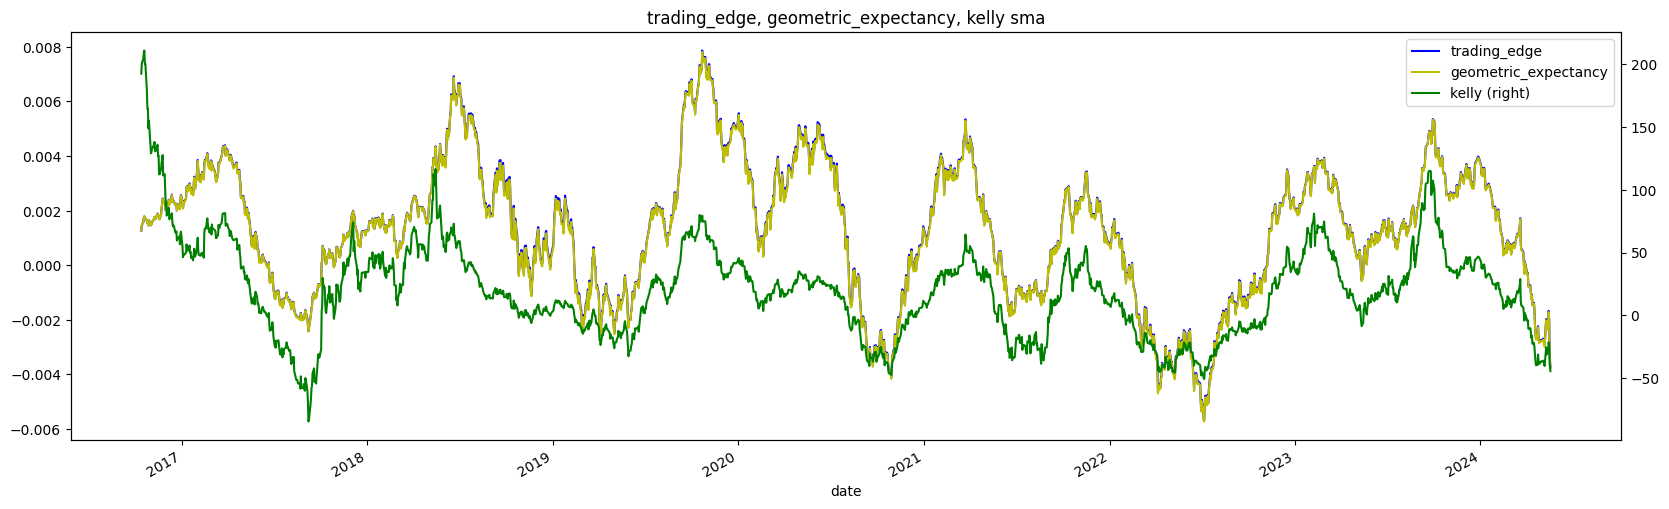

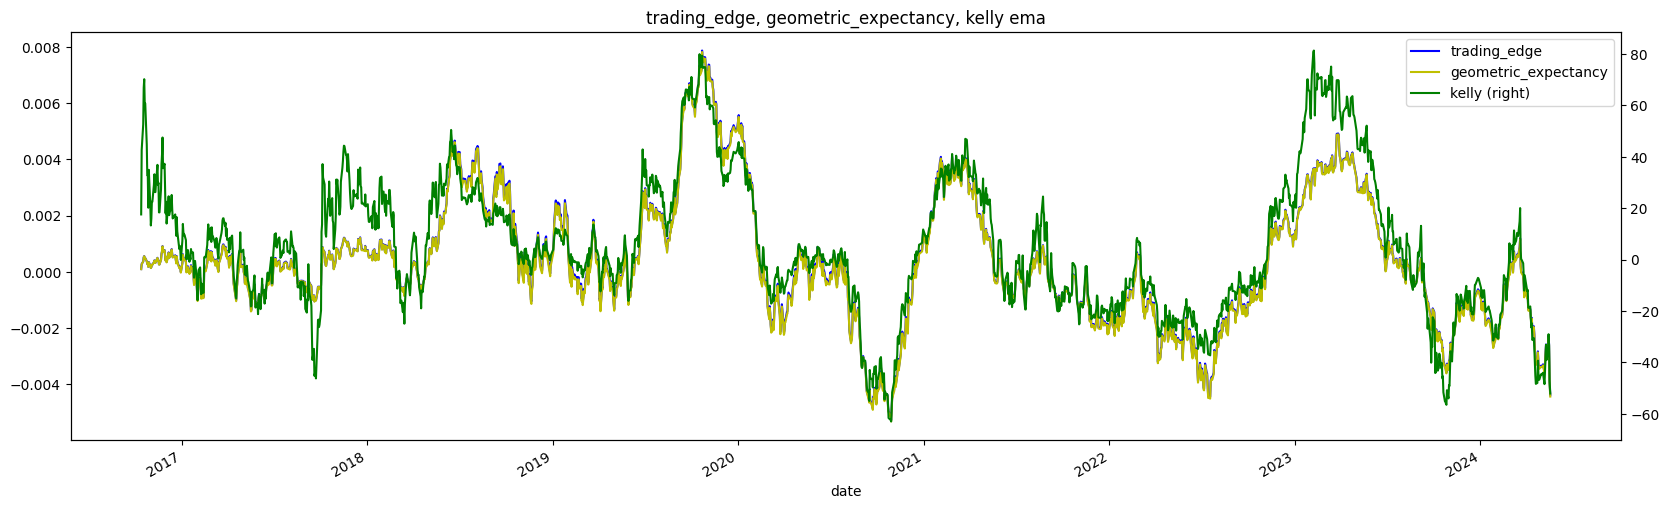

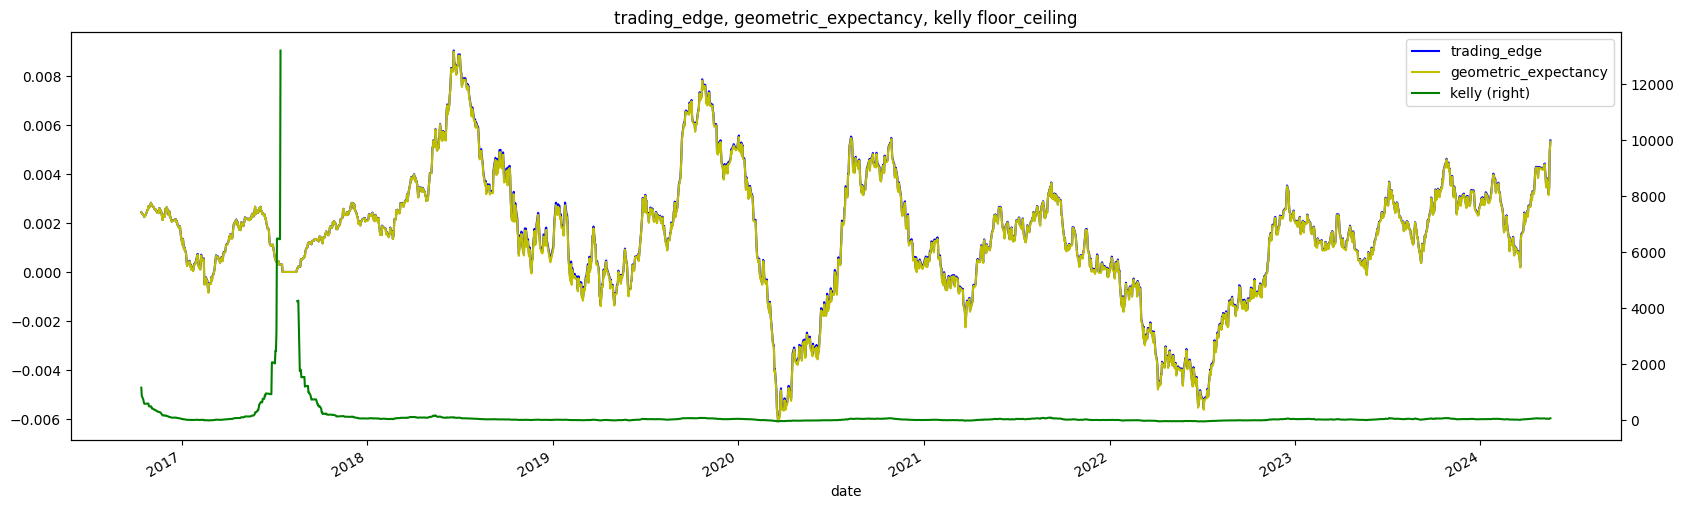

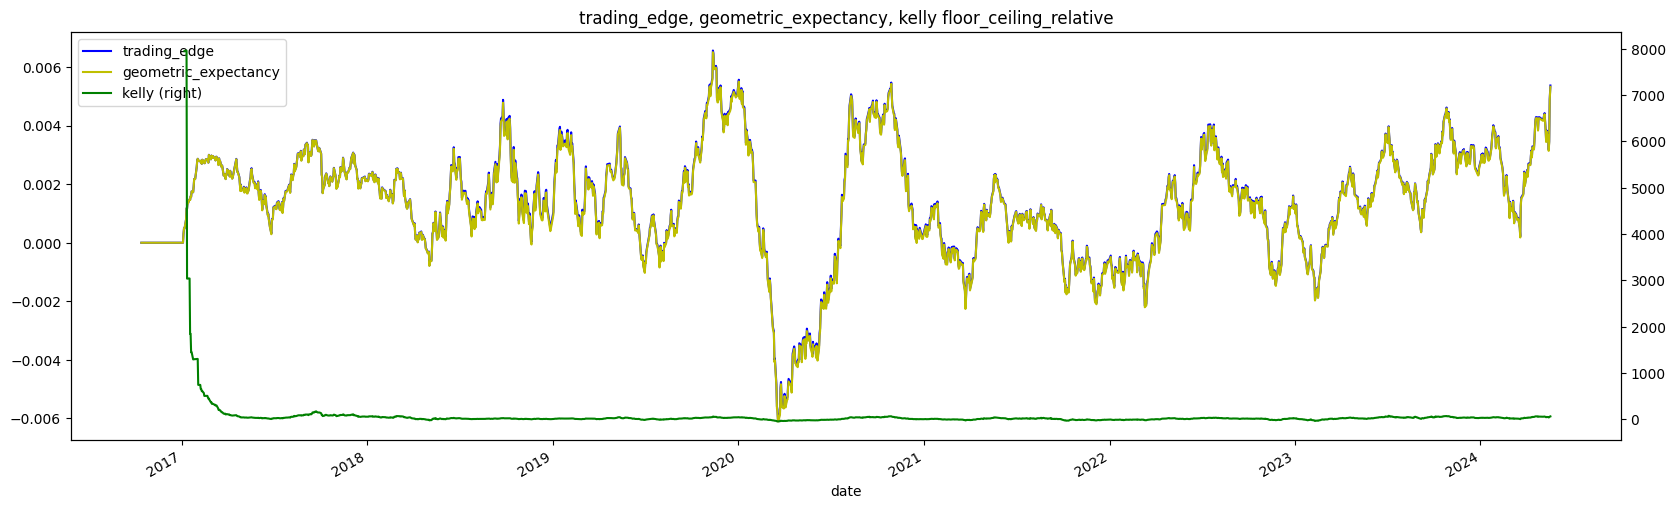

In [23]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_expectancies(df, window_exp, m)

In [24]:
starting_capital = 100000
lot = 100
mn = -0.0025
mx = -0.0075
# avg = (mn + mx) / 2
tolerance= -0.1
equal_weight = 0.05
span= 5
fx = 1

In [25]:

for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_equity_risk(df, tolerance, mn, mx, span)  # call the function on the ith dataframe and signal  
    output_signals.append(output_df)  # append the output dataframe to the list  


In [26]:

for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_shares(df, starting_capital, lot, mn, mx, tolerance, equal_weight, span, fx, s)
    output_signals.append(output_df)  # append the output dataframe to the list  


In [27]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'constant','concave','convex','equal_weight', 'tt_PL_cum_fx']]
output_df_sel.groupby('method').last() 

constant        concave         convex  \
method                                                                
breakout                126392.496717  139847.495043  139847.495043   
ema                      63692.793322   45539.189982   45539.189982   
floor_ceiling            51887.000000   30529.000000   47491.000000   
floor_ceiling_relative  103798.000000   99137.000000   94806.000000   
sma                     145917.999983  169387.199974  169387.199974   
turtle                  109313.599849  113828.099728  112969.899881   

                         equal_weight  tt_PL_cum_fx  
method                                               
breakout                118112.497747      5.174999  
ema                     110713.601971      2.976001  
floor_ceiling           128948.000000      7.610000  
floor_ceiling_relative  115055.000000      5.740000  
sma                     136734.399986     10.204000  
turtle                  101417.397451      2.394998

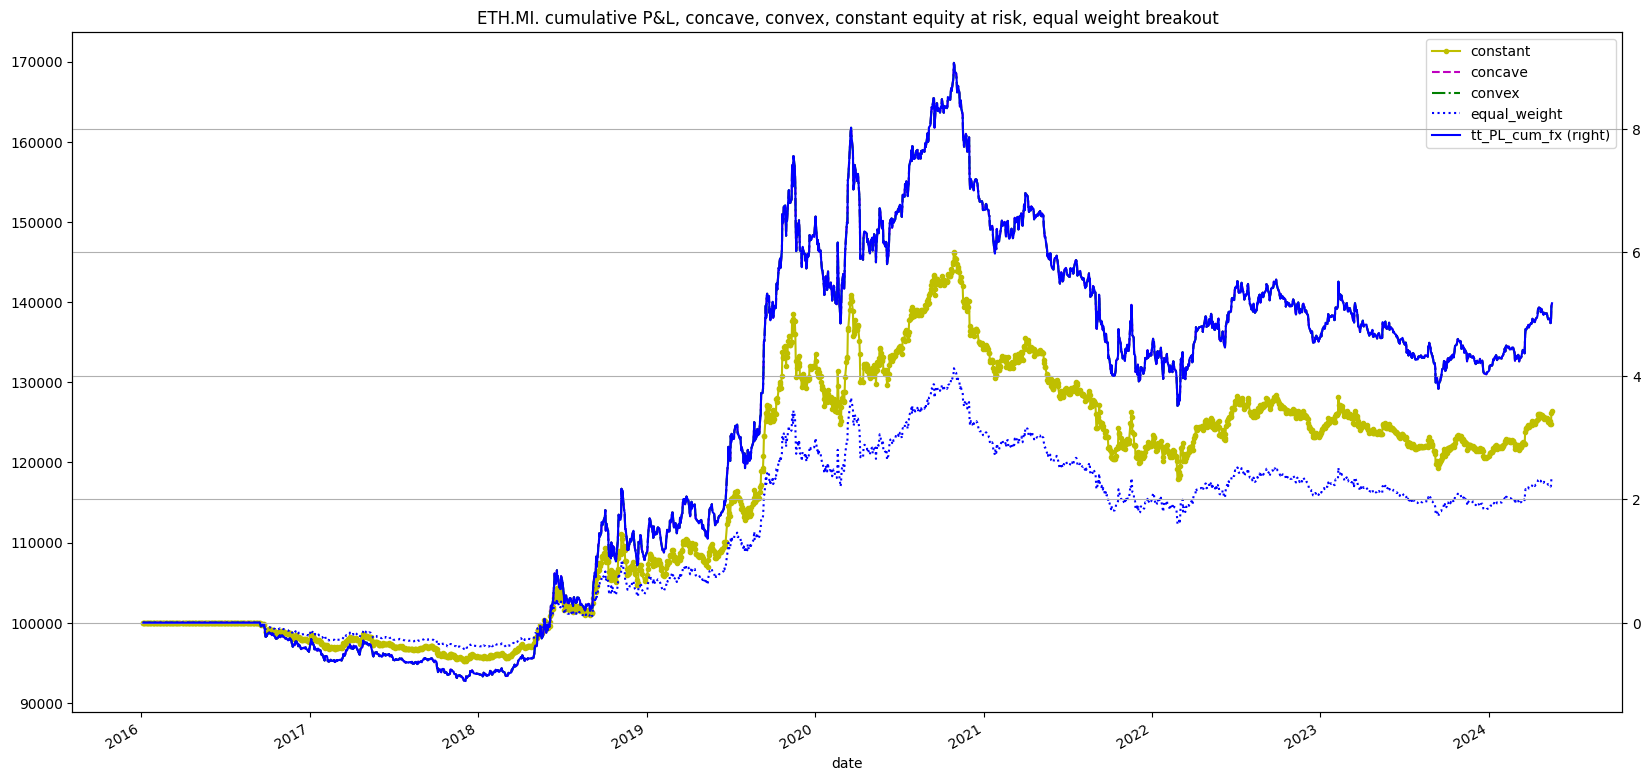

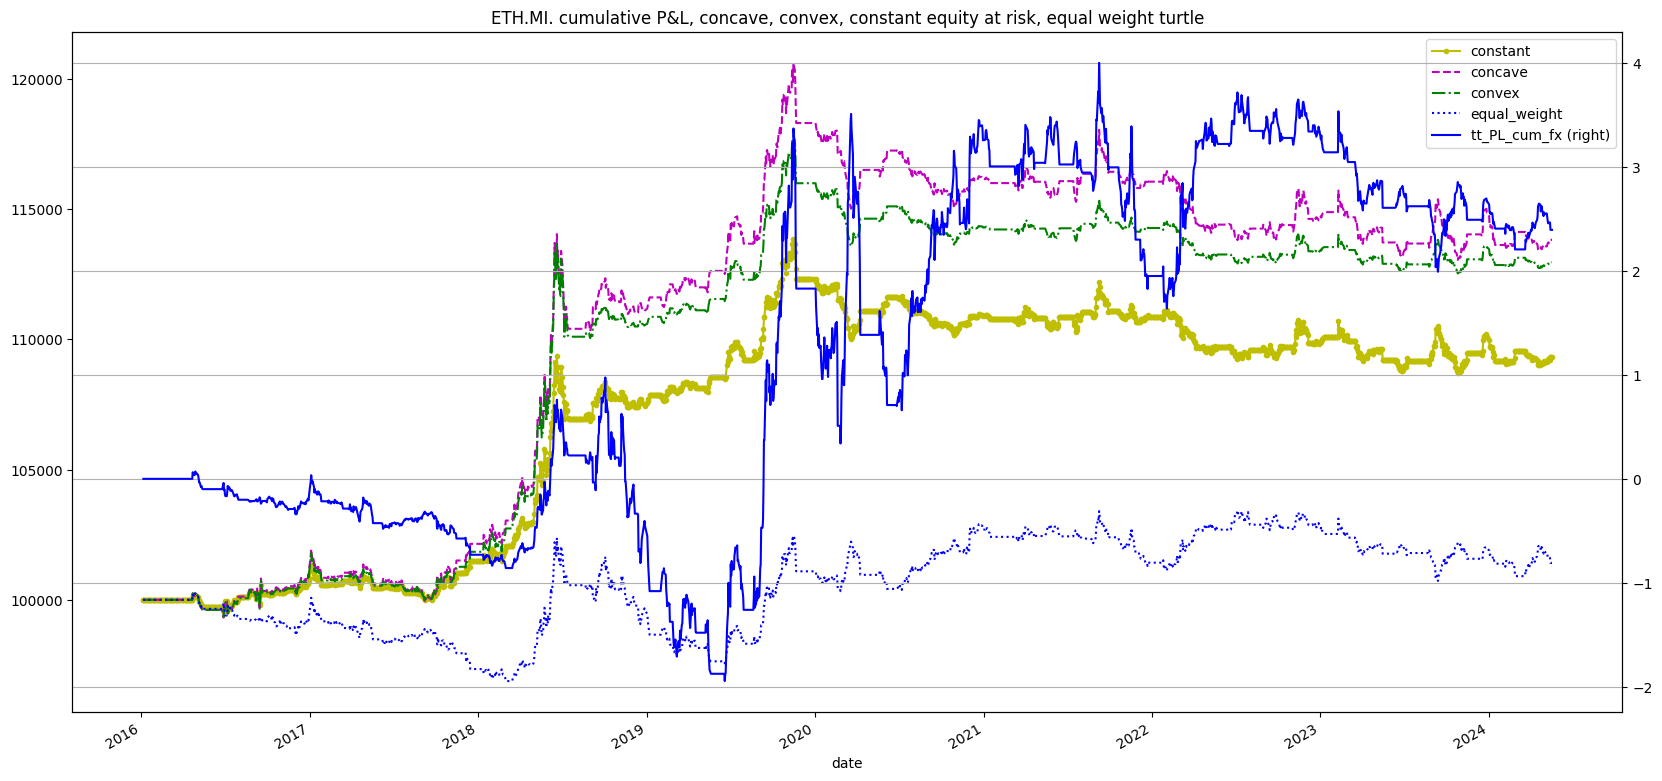

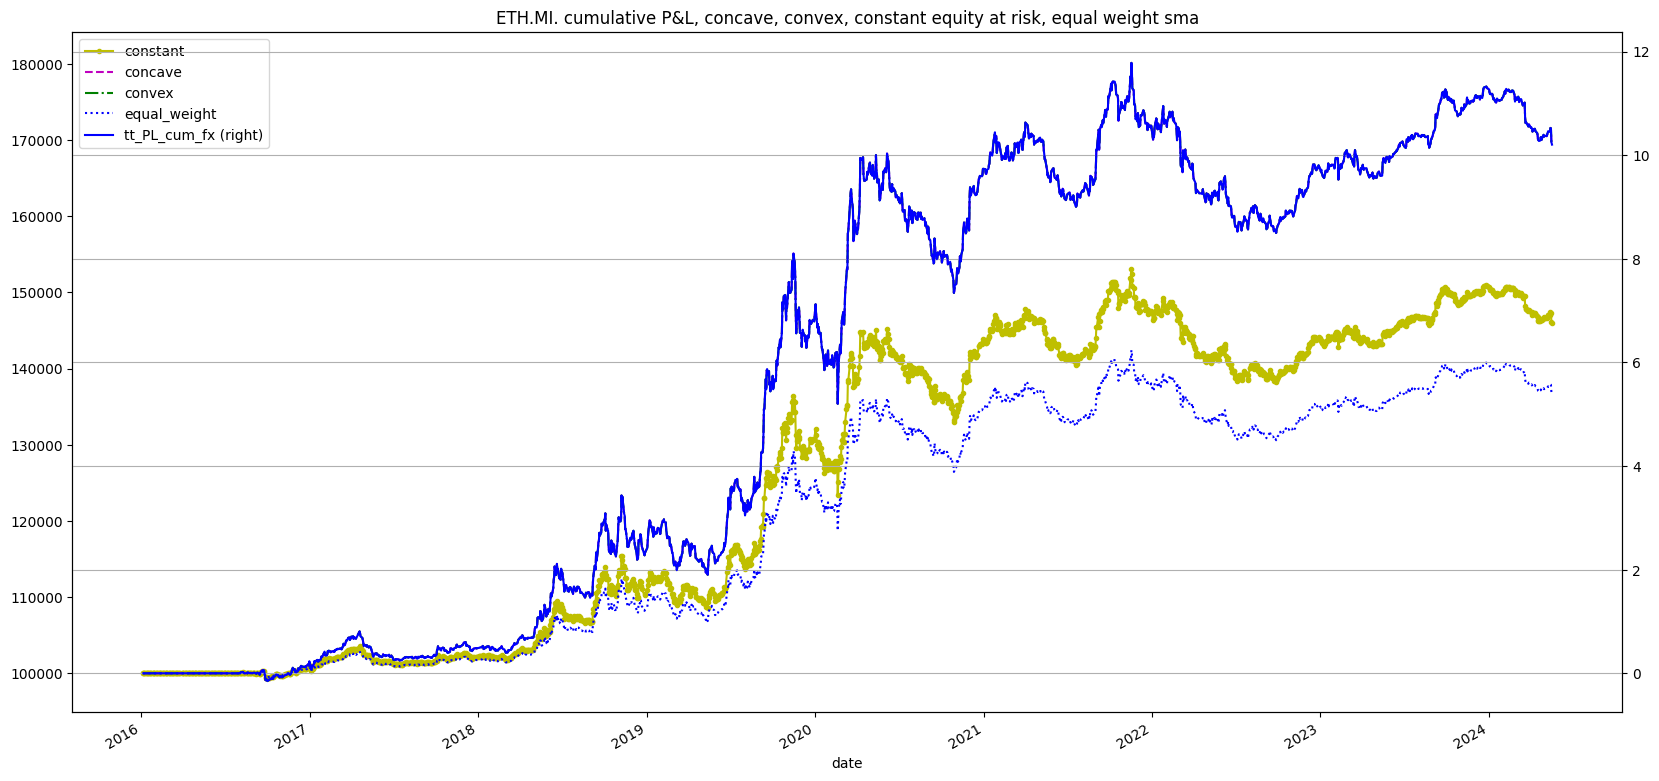

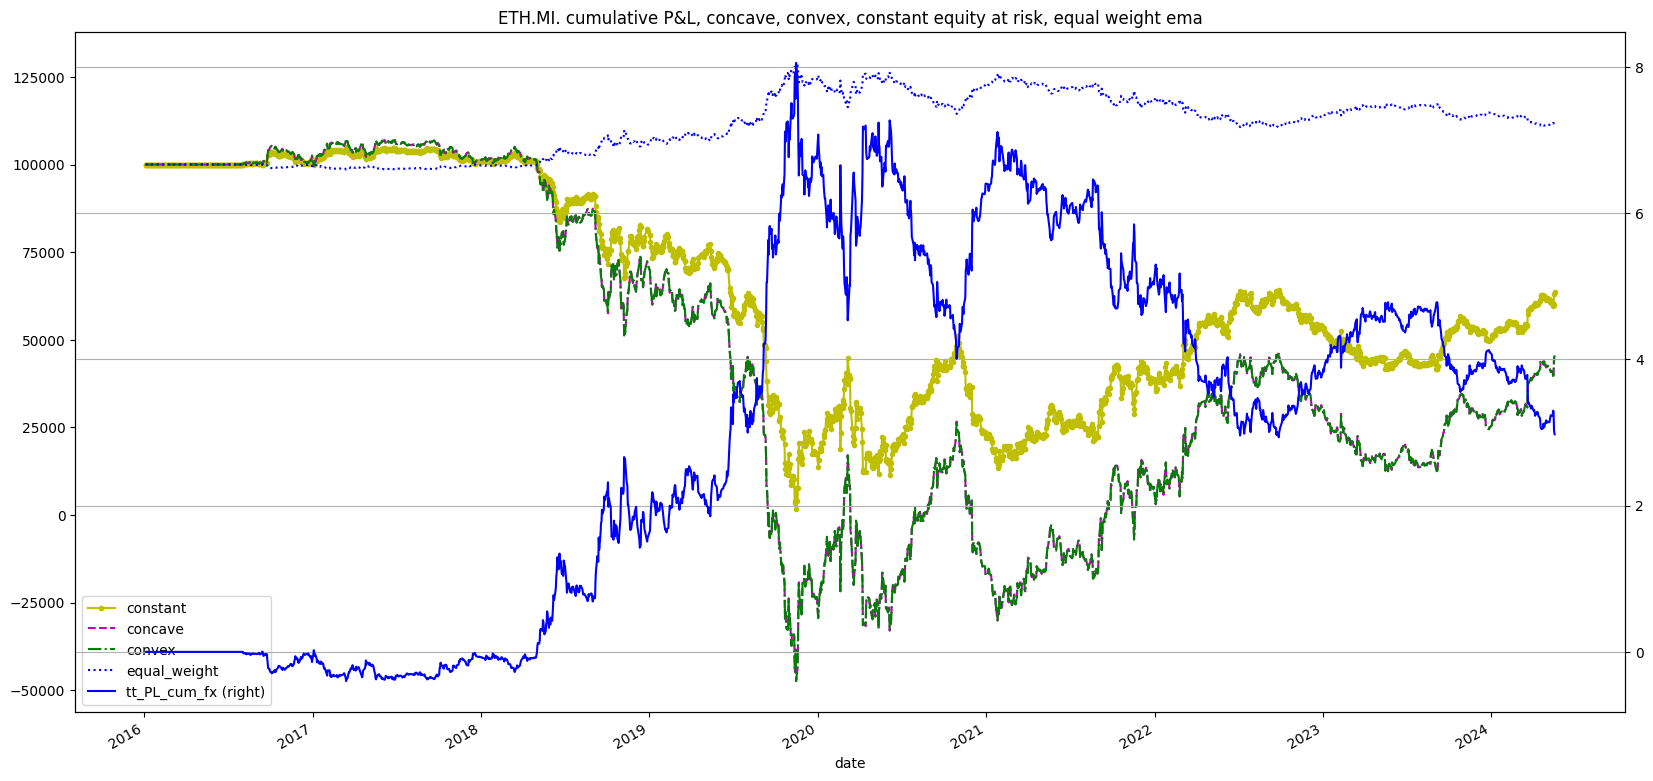

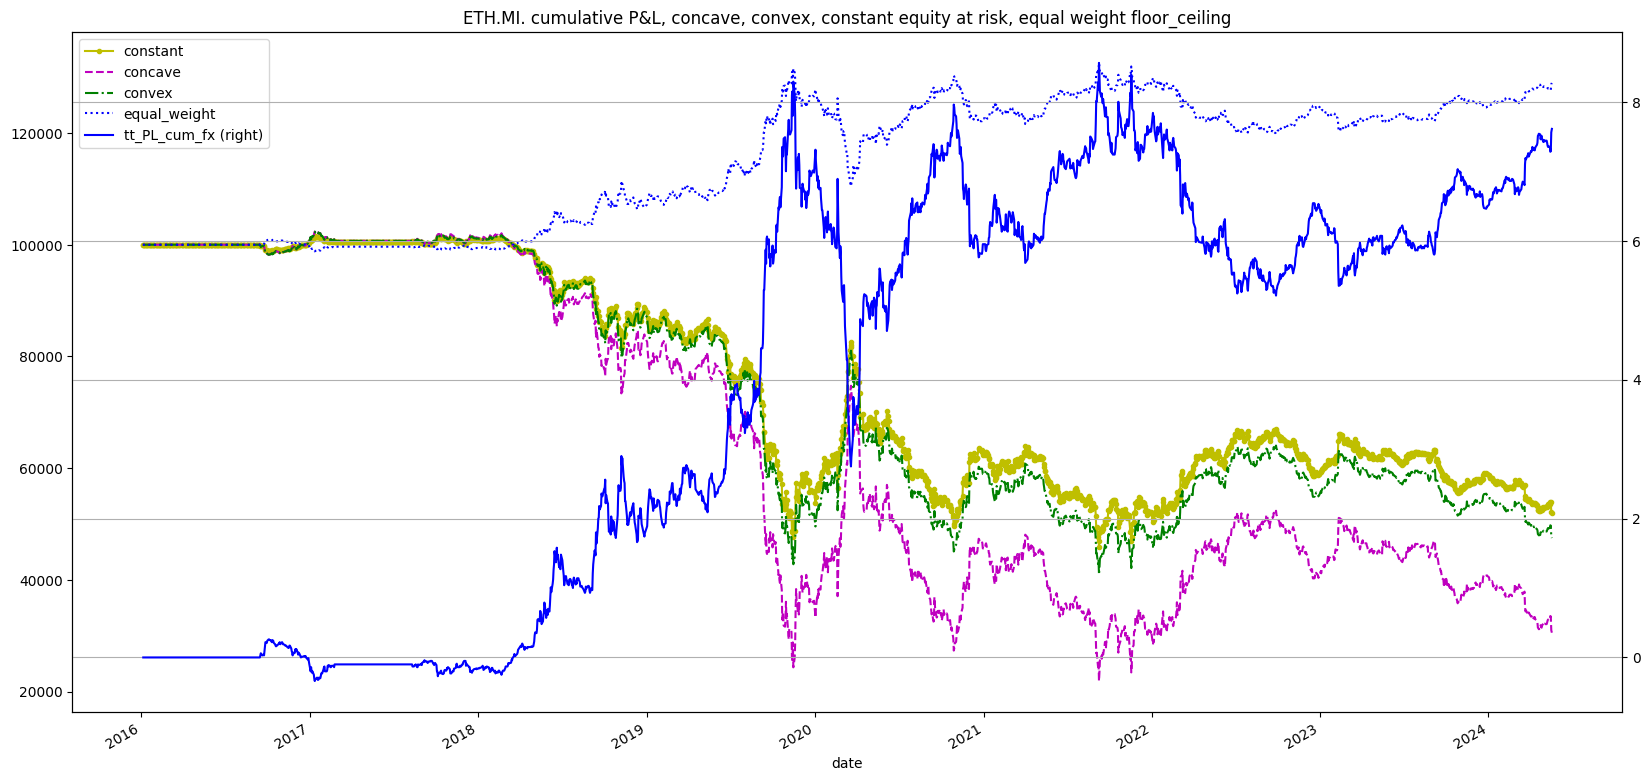

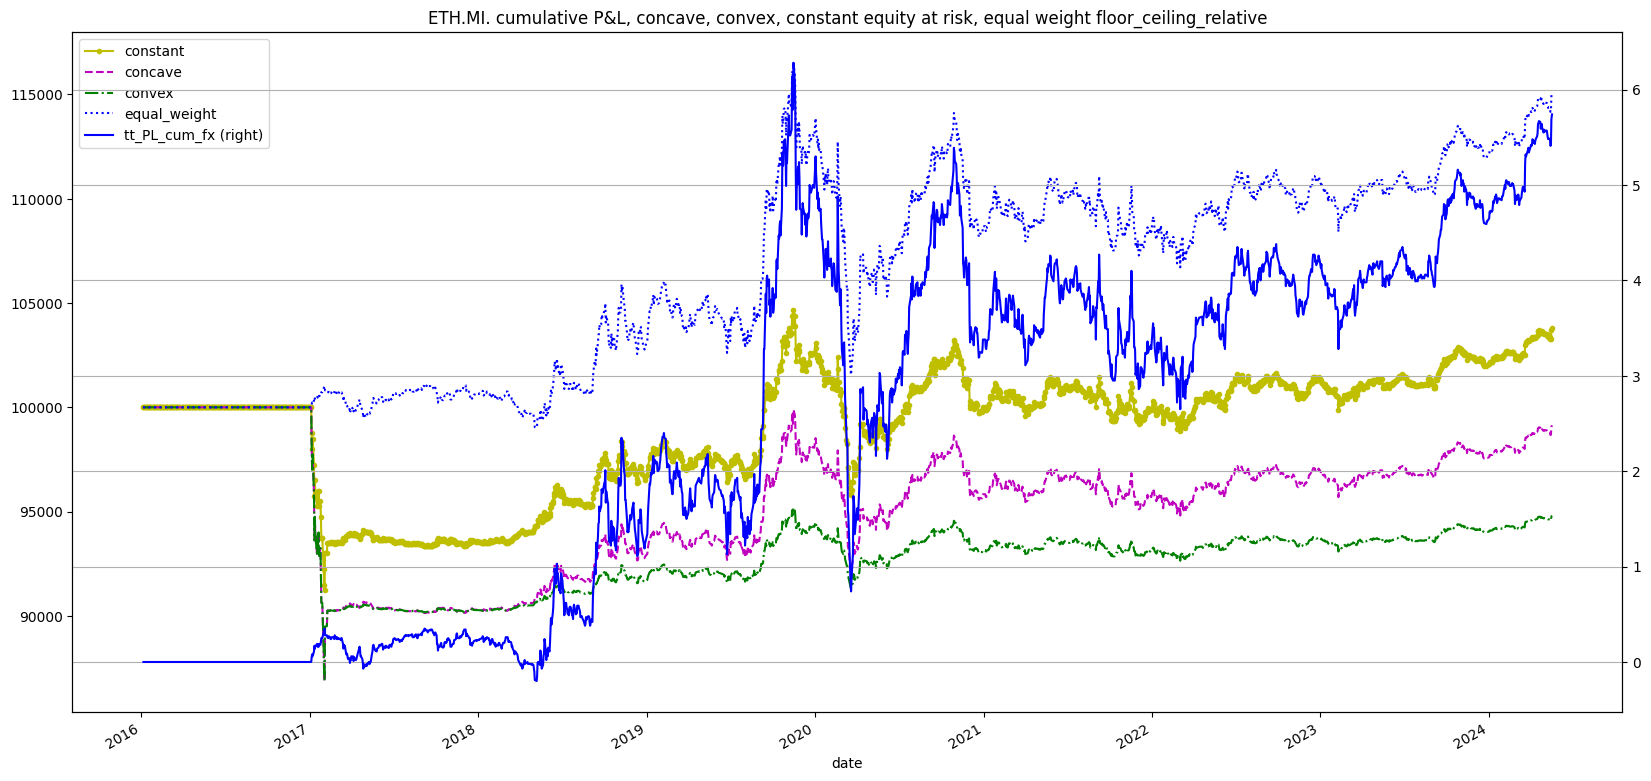

In [28]:
for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    # print(df.tail())
    plot_equity_amount(df, ticker, m)

In [29]:
# # determining the name of the file
# file_name = 'A2A_unt.xlsx'
 
# # saving the excel
# df.to_excel(file_name)

output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'shs_eql','shs_fxd','shs_ccv','shs_cvx']]
output_df_sel.groupby('method').last() 

shs_eql  shs_fxd  shs_ccv  shs_cvx
method                                                    
breakout                -4300.0   5100.0   7700.0   7700.0
ema                     -4100.0 -12200.0 -18300.0 -18300.0
floor_ceiling           -4800.0  -6300.0  -9100.0  -6900.0
floor_ceiling_relative  -4200.0   1600.0   1400.0    700.0
sma                     -5000.0   4500.0   6800.0   6800.0
turtle                  -3700.0  -1200.0  -1600.0   -900.0

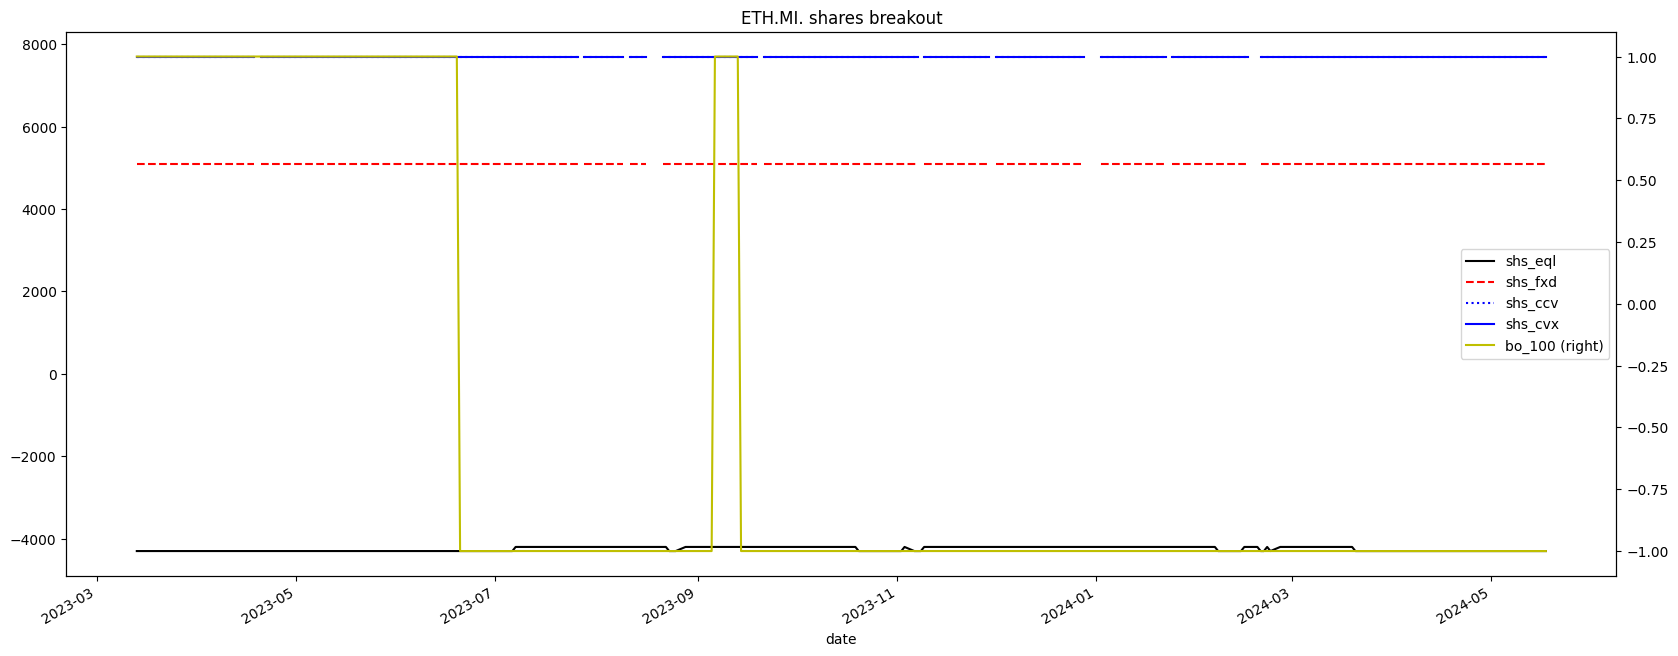

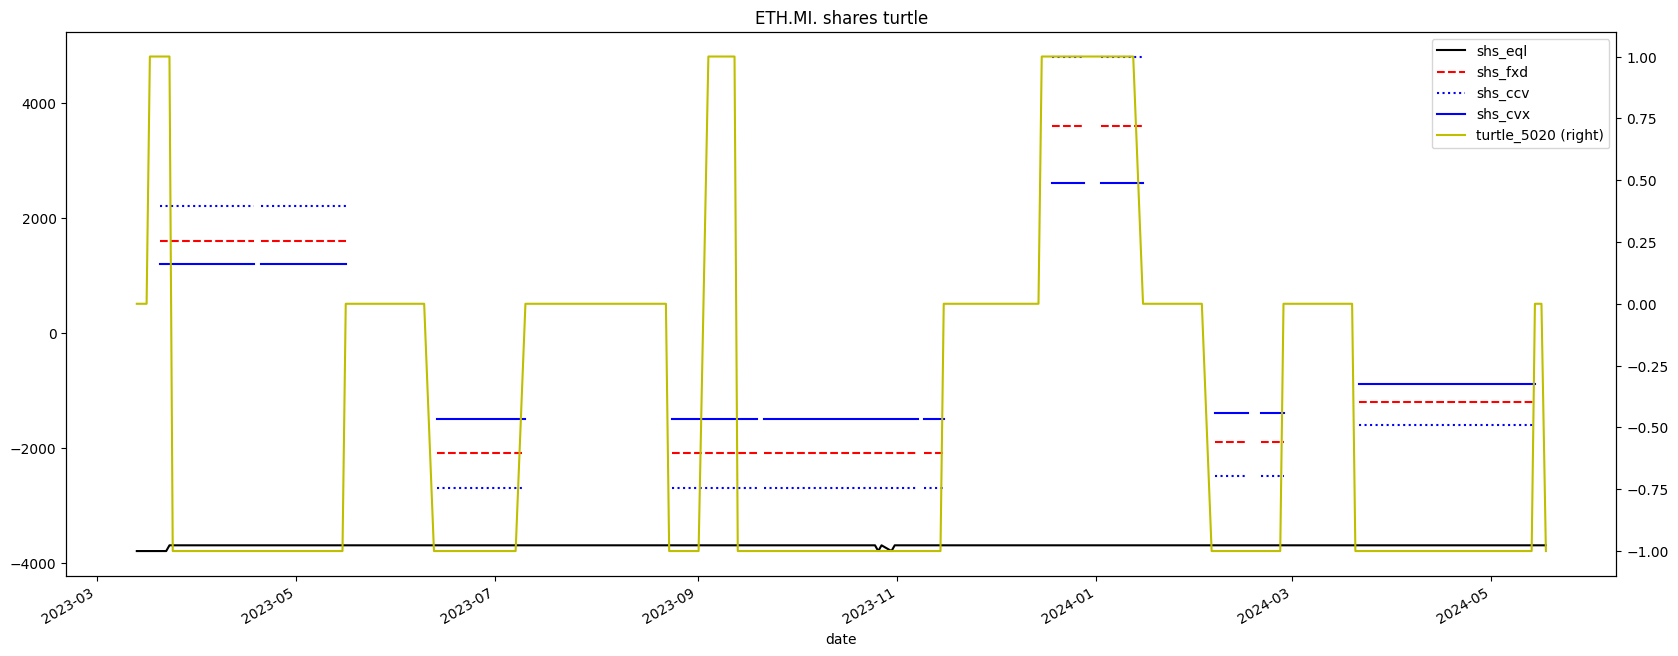

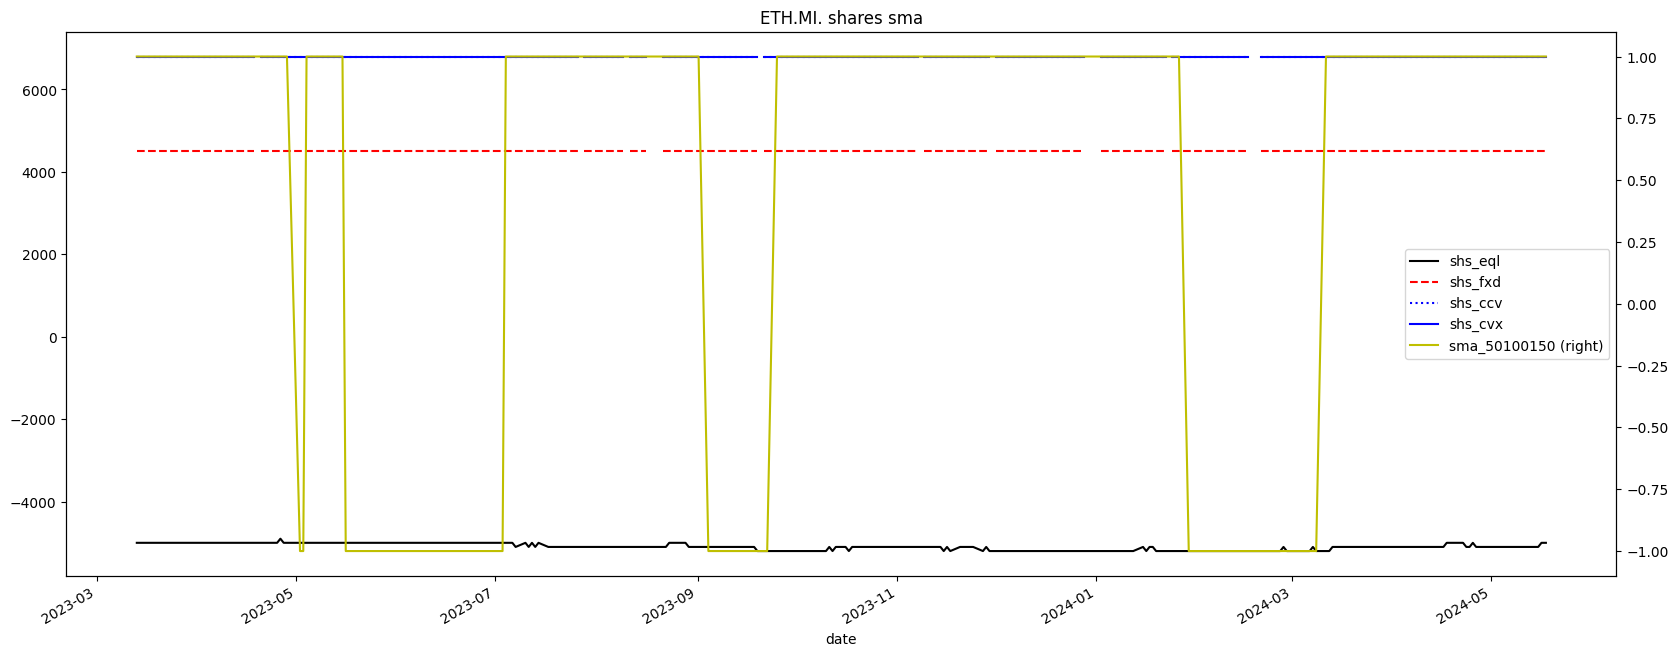

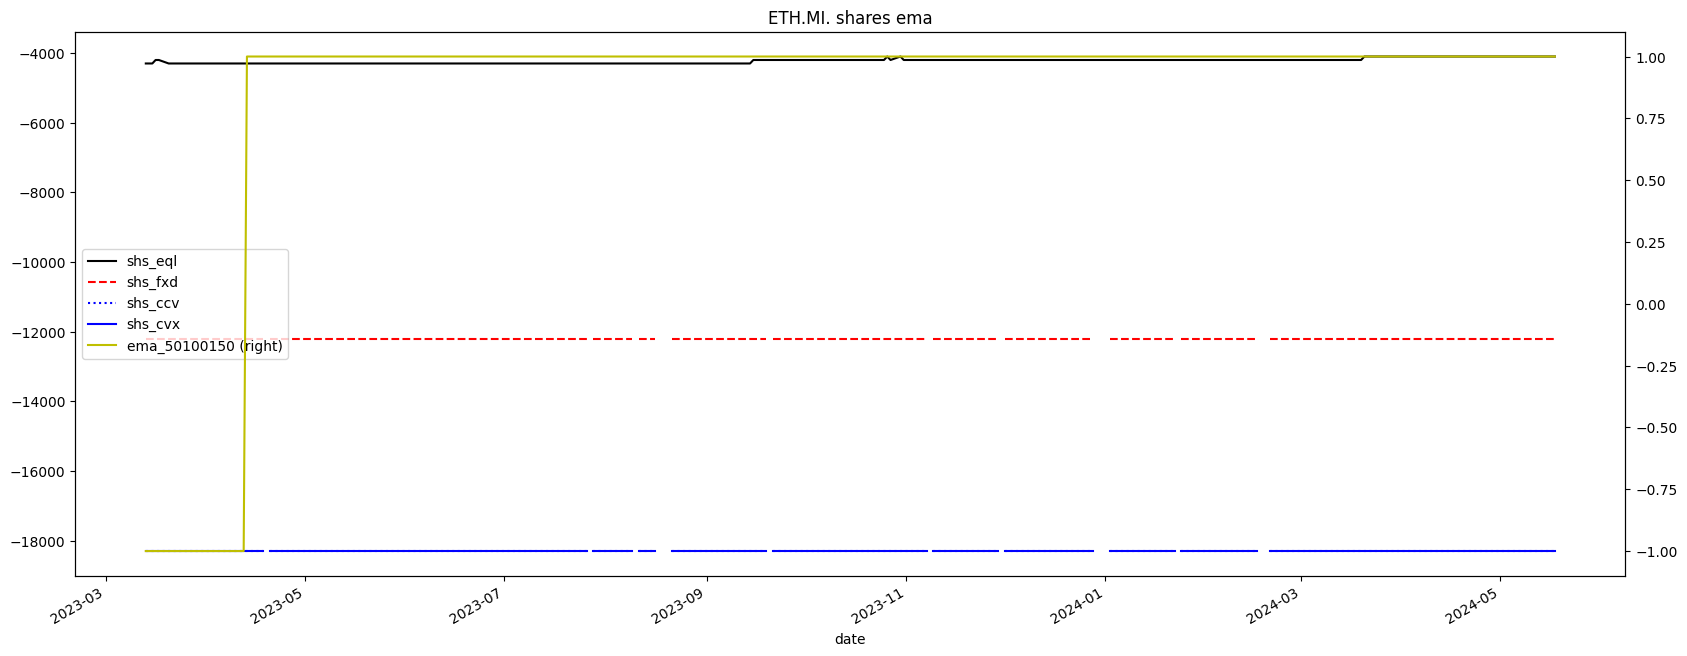

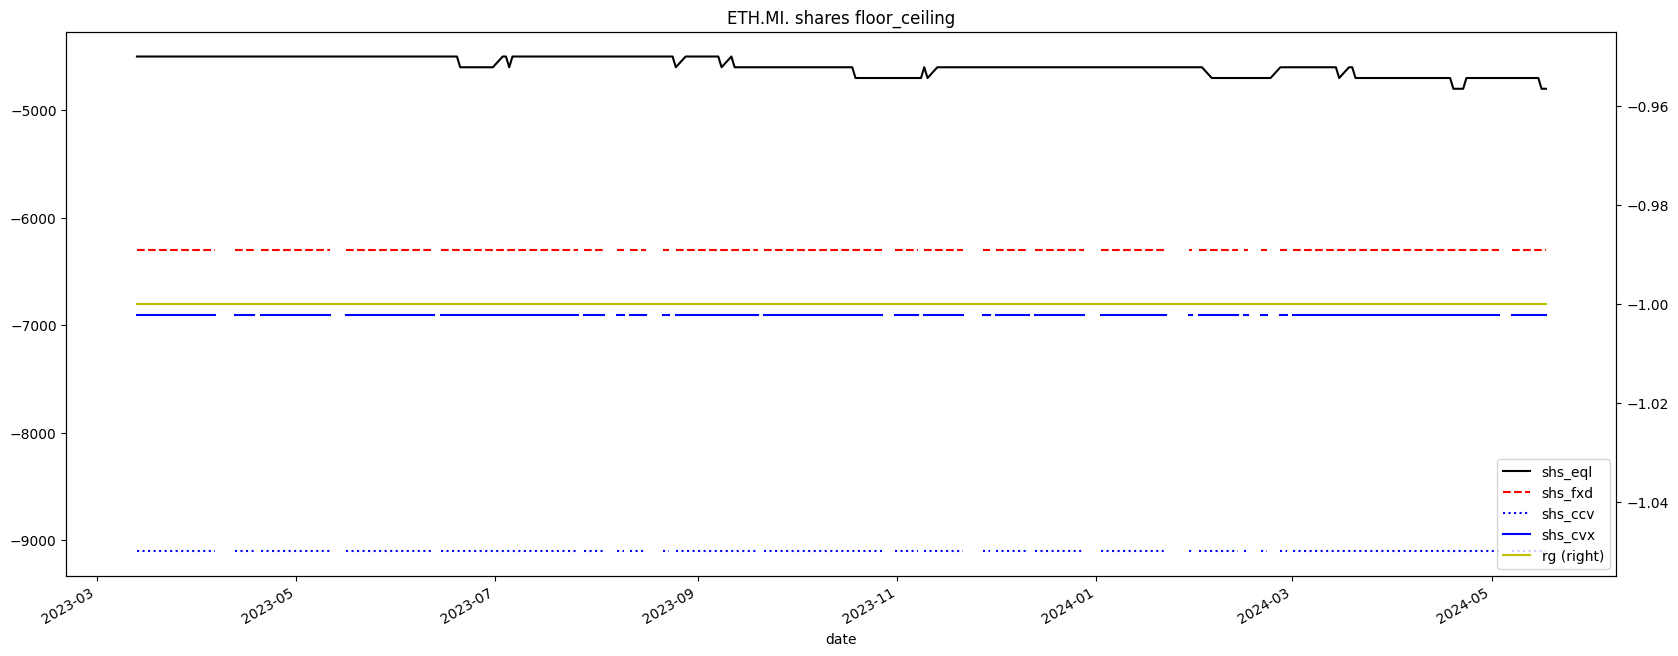

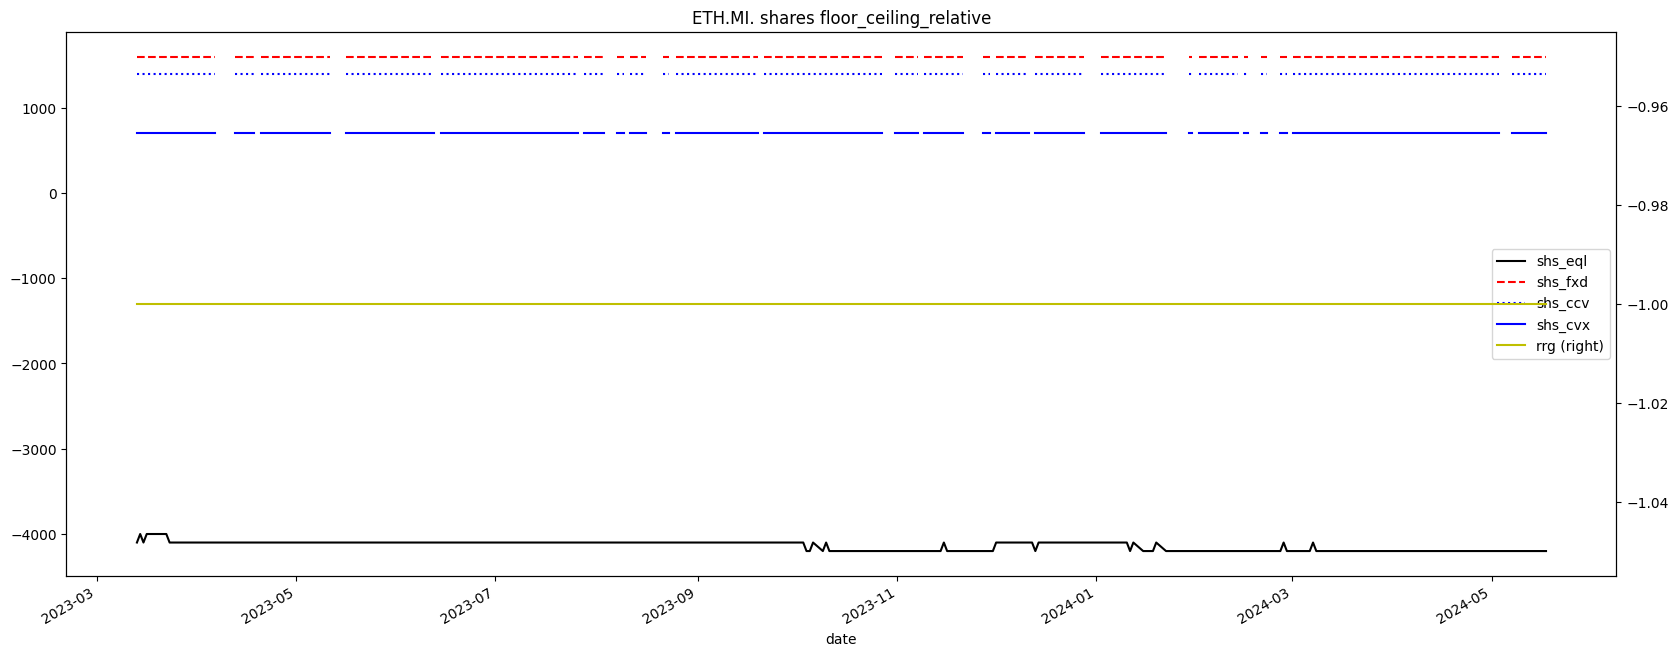

In [30]:
def plot_shares_signal(df, ticker, signal, m):
    df[['shs_eql','shs_fxd','shs_ccv','shs_cvx', signal]].plot(secondary_y=[signal],figsize=(20,8),style= ['k','r--','b:','b', 'y'],
                                                         title= str(ticker)+' shares ' + str(m))
    plt.show()
    
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_shares_signal(output_signals[i].tail(300), ticker, signal[i], method[i])
